# Contingency tables 


In [372]:
import itertools
import os
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from ptype.plotting import plot_confusion_matrix, conus_plot
from ptype.reliability importreliability_diagrams, _reliability_diagram_subplot, reliability_diagram
import matplotlib.pyplot as plt
from os.path import join
%matplotlib inline
import imageio
import matplotlib.colors as colors
import matplotlib.patches as mpatches

# function file: 
from ipynb.fs.full.newfunctions import plot_3CM, regional_CONUS
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [376]:
def regional_CONUS(latN_: int, latS_: int, lonW_: int, lonE_:int, title: str, case_dates: list)-> None:
    
    case_study = test_dataset[(test_dataset['datetime'] >= case_dates[0]) & (test_dataset['datetime'] <= case_dates[1])]
    colors = {0: "springgreen", 1: "skyblue", 2: "red", 3: "black"}
    
   
    main_title = case_dates[0]+ " to " + case_dates[1]+ ", " + title
    
    
    cLat = (latN_ + latS_) / 2
    cLon = (lonW_ + lonE_) / 2
    
     # Create the figure object with a larger canvas
    fig = plt.figure(figsize=(40, 24))
    
    
    projLcc = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    projPC = ccrs.PlateCarree()
    #res = '50m' 
    
    # true 
    ax = plt.subplot(1, 2, 1, projection=projLcc)
    ax.set_extent([lonW_, lonE_, latS_, latN_], crs=projPC)
    ax.set_facecolor(cfeature.COLORS['water'])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='--')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.set_title('mPING ' + case_dates[0]+ " to " + case_dates[1] + ", " + title, fontsize=35,fontweight='bold')
    
    labels_=["Rain", "Snow", "Ice Pellets", "Freezing Rain"]
    
   # ax.legend(colors.values(), labels=labels_, fontsize=24, markerscale=3, loc = 'lower left')
    
    column = 'true_label'
    
    
    for i in range(4):
            ax.scatter(
                case_study["lon"][case_study[column] == i] - 360,
                case_study["lat"][case_study[column] == i],
                c=case_study[column][case_study[column] == i].map(colors),
                s=250,
                transform=ccrs.PlateCarree(),
                alpha=0.2,
            )
            
            
    # prediction 

    projLccEur = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
    
    proj = ccrs.PlateCarree()

    ax2 = plt.subplot(1, 2, 2, projection=projLccEur)
    ax2.set_extent([lonW_, lonE_, latS_, latN_], crs=proj)
    ax2.set_facecolor(cfeature.COLORS['water'])
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.COASTLINE)
    ax2.add_feature(cfeature.BORDERS, linestyle='--')
    ax2.add_feature(cfeature.LAKES, alpha=0.5)
    ax2.add_feature(cfeature.STATES)
    
    ax2.set_title('Predictions ' + case_dates[0]+ " to " + case_dates[1] + ", " + title, fontsize=35,fontweight='bold')
    
    #ax2.legend(colors.values(), labels=labels_, fontsize=10, loc = 'center')

    pred = 'pred_label'
    
    for i in range(4):
            ax2.scatter(
                case_study["lon"][case_study[pred] == i] - 360,
                case_study["lat"][case_study[pred] == i],
                c=case_study[pred][case_study[pred] == i].map(colors),
                s=250,
                transform=ccrs.PlateCarree(),
                alpha=0.2,
            )
    

    # Create a common legend outside the subplots
    legend_patches = [
        #mpatches.Circle((0, 0), 0.5, facecolor=colors[0], label=labels_[0]),
        mpatches.Patch(facecolor=colors[0], label=labels_[0]),
        mpatches.Patch(facecolor=colors[1], label=labels_[1]),
        mpatches.Patch(facecolor=colors[2],label=labels_[2]),
        mpatches.Patch(facecolor=colors[3], label=labels_[3])
    
    ]
    
    fig.legend(handles=legend_patches, bbox_to_anchor=(0.99, 0.43), loc='upper right', prop={'size': 25})
    
    
    plt.tight_layout()
    #fig.suptitle(main_title, fontsize=15, fontweight="bold")
    #plt.subplots_adjust(top=0.2)
    plt.show()


In [336]:
def regional_CONUS_(latN_: int, latS_: int, lonW_: int, lonE_:int, title: str, pred, case_dates: list)-> None:

    case_study = test_dataset[(test_dataset['datetime'] >= case_dates[0]) & (test_dataset['datetime'] <= case_dates[1])]
    colors = {0: "springgreen", 1: "skyblue", 2: "red", 3: "black"}
    
   
    main_title = case_dates[0]+ " to " + case_dates[1]+ ", " + title
    
    
    cLat = (latN_ + latS_) / 2
    cLon = (lonW_ + lonE_) / 2
    
    # Create the figure object with a larger canvas
    fig = plt.figure(figsize=(40, 24))
    
    projLcc = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    proj = ccrs.PlateCarree()
    
    # mPING data 

    ax = plt.subplot(1, 2, 1, projection=projLcc)
    ax.set_extent([lonW_, lonE_, latS_, latN_], crs=proj)
    ax.set_facecolor(cfeature.COLORS['water'])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='--')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.set_title('mPING ' + case_dates[0]+ " to " + case_dates[1] + ", " + title, fontsize=35,fontweight='bold')
    
    labels_=["Rain", "Snow", "Ice Pellets", "Freezing Rain"]
    
   # ax.legend(colors.values(), labels=labels_, fontsize=24, markerscale=3, loc = 'lower left')
    
    column = 'true_label'
    
    
    for i in range(4):
            ax.scatter(
                case_study["lon"][case_study[column] == i] - 360,
                case_study["lat"][case_study[column] == i],
                c=case_study[column][case_study[column] == i].map(colors),
                s=250,
                transform=ccrs.PlateCarree(),
                alpha=0.2,
            )
            
            
    # RAP 
    ax2 = plt.subplot(1, 2, 2, projection=projLcc)
    ax2.set_extent([lonW_, lonE_, latS_, latN_], crs=proj)
    ax2.set_facecolor(cfeature.COLORS['water'])
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.COASTLINE)
    ax2.add_feature(cfeature.BORDERS, linestyle='--')
    ax2.add_feature(cfeature.LAKES, alpha=0.5)
    ax2.add_feature(cfeature.STATES)
    
    ax2.set_title('Predictions ' + case_dates[0]+ " to " + case_dates[1] + ", " + title, fontsize=35,fontweight='bold')
    
    #ax2.legend(colors.values(), labels=labels_, fontsize=10, loc = 'center')

 #   pred = 'pred_label'
    
    for i in range(4):
            ax2.scatter(
                sourcedata["lon"][pred == i] - 360,
                sourcedata["lat"][pred == i],
                c=pred[[pred] == i].map(colors), #!!!
                s=250,
                transform=ccrs.PlateCarree(),
                alpha=0.2,
            )
    

    # Create a common legend outside the subplots
    legend_patches = [
        #mpatches.Circle((0, 0), 0.5, facecolor=colors[0], label=labels_[0]),
        mpatches.Patch(facecolor=colors[0], label=labels_[0]),
        mpatches.Patch(facecolor=colors[1], label=labels_[1]),
        mpatches.Patch(facecolor=colors[2],label=labels_[2]),
        mpatches.Patch(facecolor=colors[3], label=labels_[3])
    
    ]
    
    fig.legend(handles=legend_patches, bbox_to_anchor=(0.99, 0.43), loc='upper right', prop={'size': 25})
    
    
    plt.tight_layout()
    #fig.suptitle(main_title, fontsize=15, fontweight="bold")
    #plt.subplots_adjust(top=0.2)
    plt.show()


### Case Study Data: First example

In [258]:
ds = xr.open_dataset("/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/rap/20220223/0000/MILES_ptype_rap_2022-02-23_0000_f01.nc")
data_set = xr.open_mfdataset("/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/rap/20220223/0000/*.nc",concat_dim= "time",combine="nested") #parallel == true

In [30]:
# ML categorical  
pred= ds['ML_crain'].values.flatten() 
pred = np.zeros(shape=pred.shape) 

In [31]:
rain_i = np.where(ds['ML_crain'].values.flatten()==1) 
snow_i = np.where(ds['ML_csnow'].values.flatten()==1) 
sleet_i = np.where(ds['ML_cicep'].values.flatten()==1)  
frzr_i = np.where(ds['ML_cfrzr'].values.flatten()==1)

#repopulate the numpy array 
pred[rain_i]=0
pred[snow_i]=1
pred[sleet_i]=2
pred[frzr_i]=3

In [32]:
Counter(pred)

Counter({0.0: 78853, 1.0: 66955, 3.0: 4181, 2.0: 1998})

In [33]:
#Labels:
truth = ds['crain'].values.flatten()
truth = np.zeros(shape=truth.shape)

In [34]:
rain_i_T = np.where(ds['crain'].values.flatten()==1)
snow_i_T= np.where(ds['csnow'].values.flatten()==1) 
sleet_i_T= np.where(ds['cicep'].values.flatten()==1) 
frzr_i_T= np.where(ds['cfrzr'].values.flatten()==1) 

truth[rain_i_T]=0
truth[snow_i_T]=1
truth[sleet_i_T]=2
truth[frzr_i_T]=3

## Evidential Unweighted Normalized (Single Ensemble)

In [357]:
class_names = ['rain', 'snow', 'sleet', 'frz-rain']

In [358]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/evidential_unweighted/evaluate/"
data_files = ["train", "test", "val"]
mod_num = 0

#train dataset
train_dataset = pd.read_parquet(join(path, f"train_{mod_num:d}.parquet"))
train_pred_labels = train_dataset["pred_label"].values
train_true_labels =  train_dataset["true_label"].values

#test dataset
test_dataset = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))
test_pred_labels = test_dataset["pred_label"].values
test_true_labels =  test_dataset["true_label"].values

#val dataset
val_dataset = pd.read_parquet(join(path, f"val_{mod_num:d}.parquet"))
val_pred_labels = val_dataset["pred_label"].values
val_true_labels =  val_dataset["true_label"].values

In [359]:
# SOURCE test_dataset:
case_date = ["2022-02-23", "2022-02-24"]
sourcedata = test_dataset[(test_dataset['datetime'] >= case_date[0]) & (test_dataset['datetime'] <= case_date[1])]


In [330]:
# Prediction: 
pred= sourcedata['CRAIN'].values.flatten() 
pred = np.zeros(shape=pred.shape) 

In [325]:
rain_i = np.where(sourcedata['CRAIN'].values.flatten()==1) 
snow_i = np.where(sourcedata['CSNOW'].values.flatten()==1) 
sleet_i = np.where(sourcedata['CICEP'].values.flatten()==1)  
frzr_i = np.where(sourcedata['CFRZR'].values.flatten()==1)

#repopulate the numpy array 
pred[rain_i]=0
pred[snow_i]=1
pred[sleet_i]=2
pred[frzr_i]=3

AttributeError: 'numpy.ndarray' object has no attribute 'map'

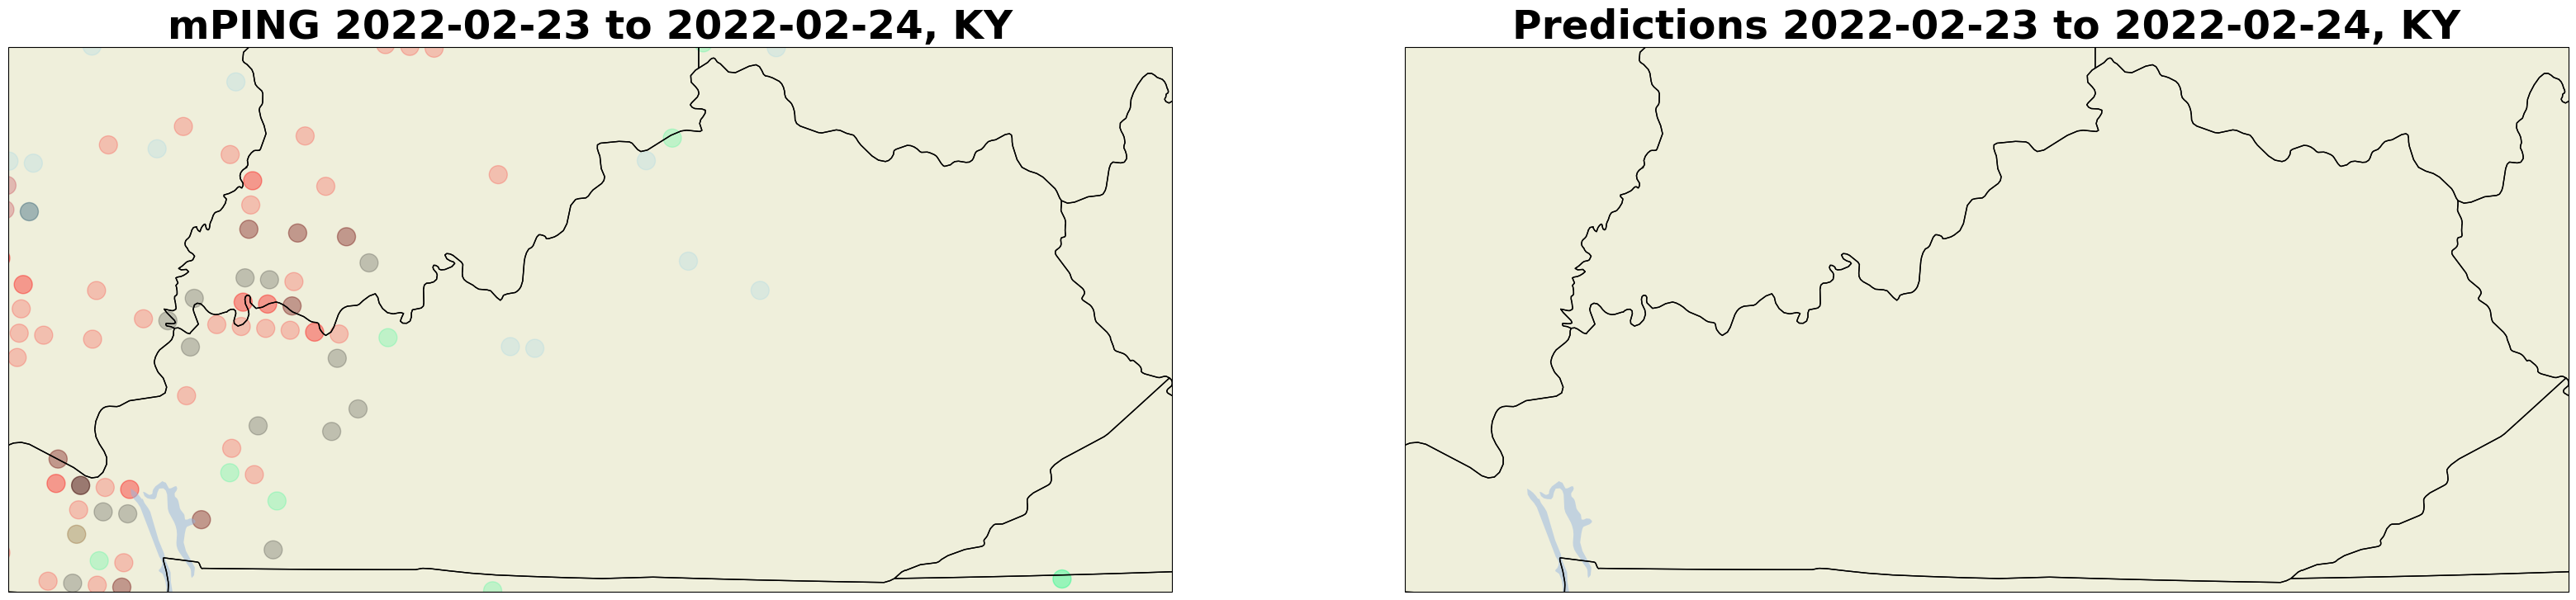

In [339]:
#KY case 
case_date = ["2022-02-23", "2022-02-24"]
case = "KY" 
#regional_CONUS_(39.15, 36.5,-89, -82, case, pred, case_date)

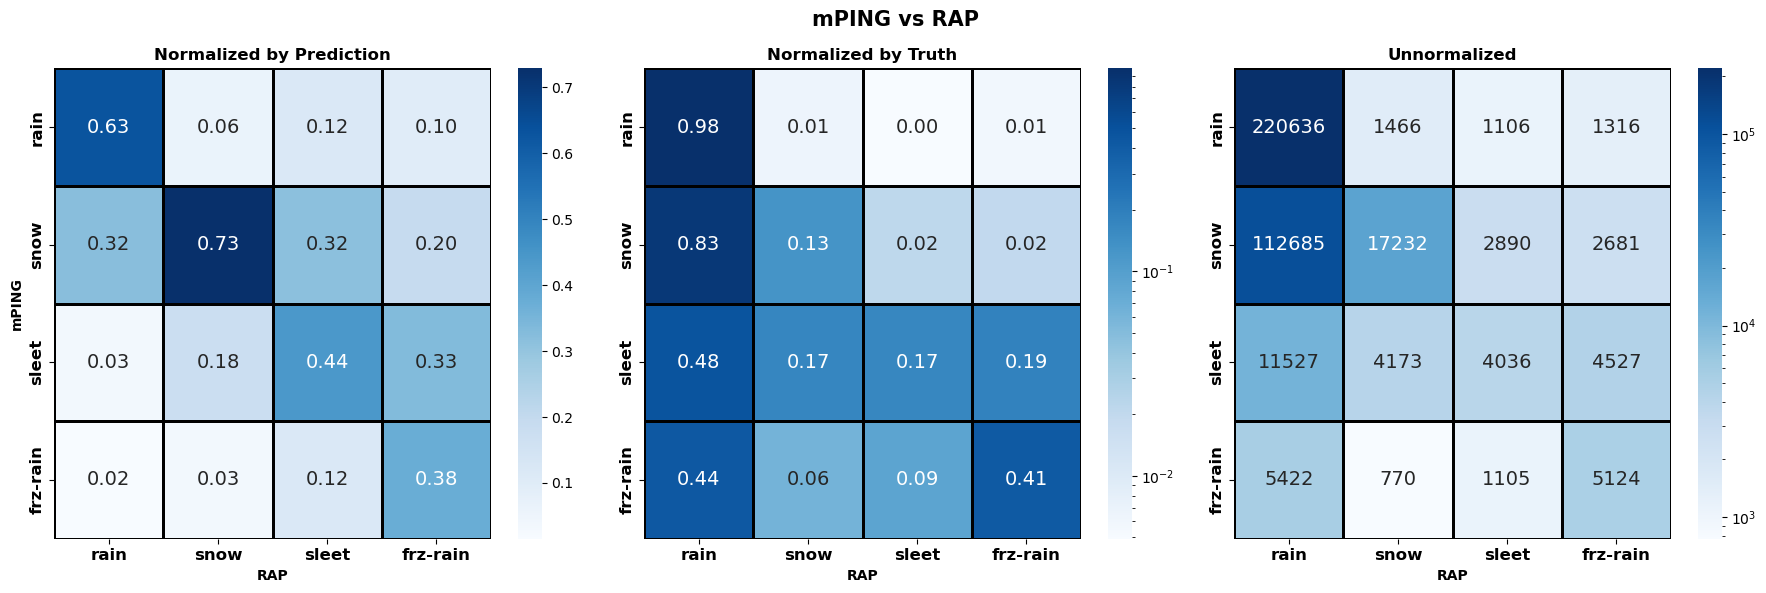

In [11]:
# modify x and y label 
savehere = "/glade/work/saavedrab/ptype-physical/notebooks/mPingvsRAP.png"
plot_3CM(test_true_labels, pred, "mPING vs RAP", class_names)

In [ ]:
case_date = ["2022-02-23", "2022-02-24"]
case = "KY, mPING vs RAP" 

In [ ]:
# mpING vs RAP Conus plot 

regional_CONUS_(39.15, 36.5,-89, -82, case, case_dates)

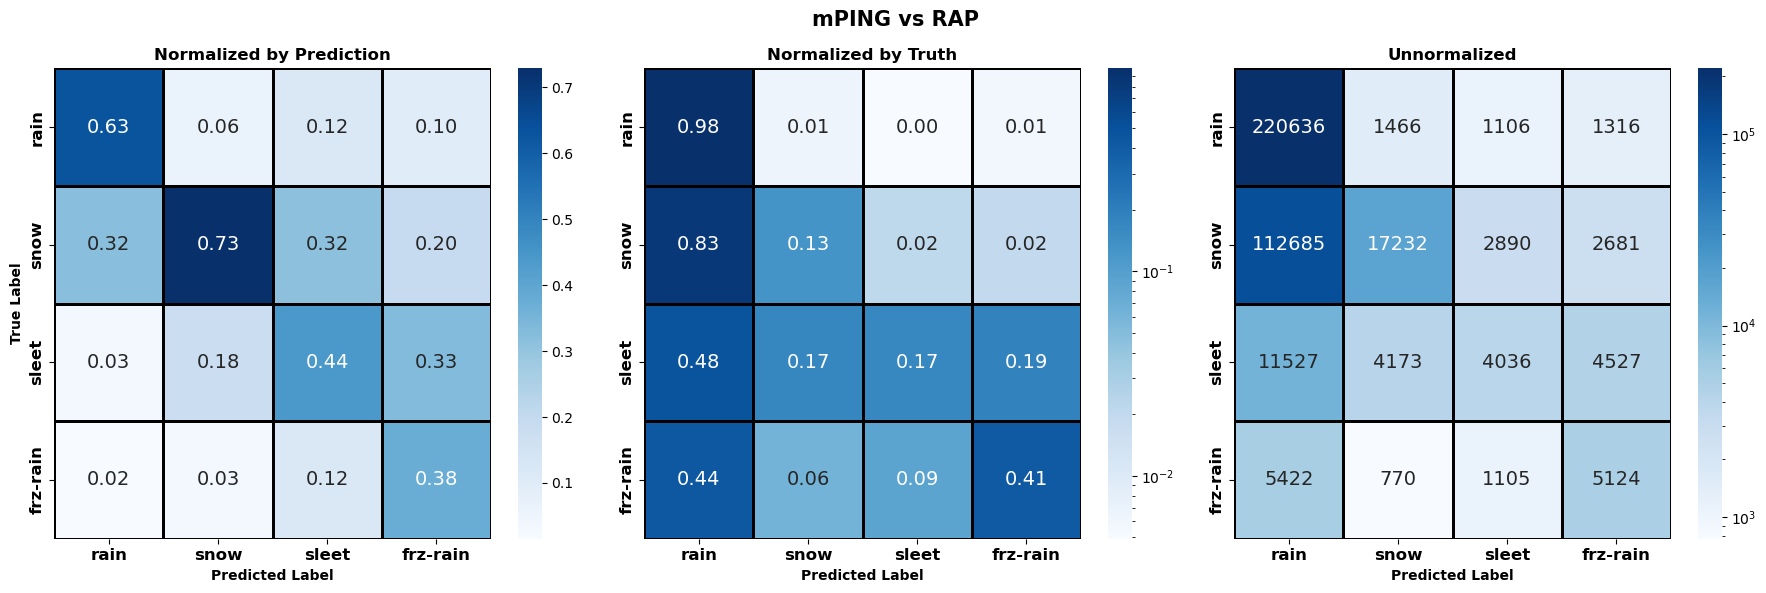

In [13]:
plot_3CM(test_true_labels, pred, "mPING vs RAP", class_names)

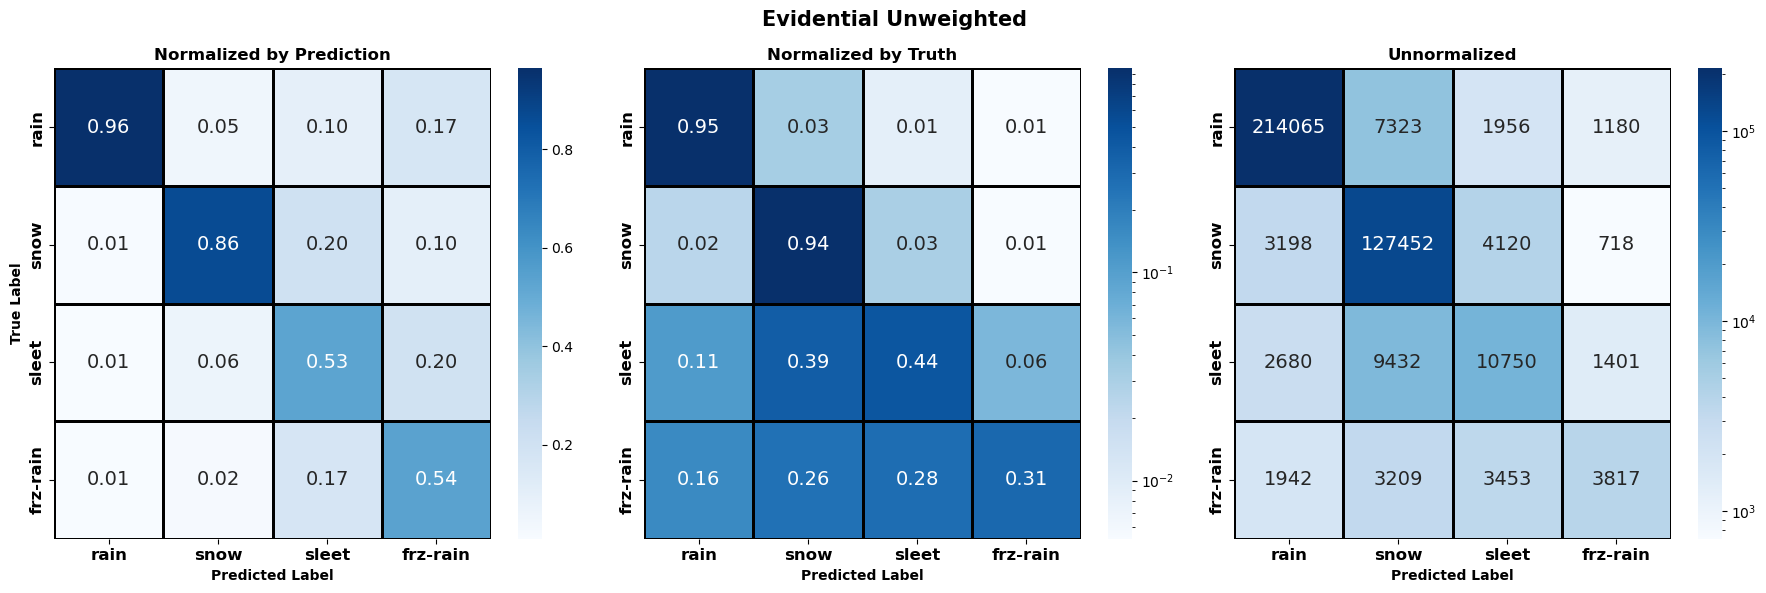

In [88]:
plot_3CM(test_true_labels, test_pred_labels, "Evidential Unweighted", class_names)

In [164]:
conf = test_dataset["pred_conf"].values


In [165]:
truth = test_dataset["true_label"].values


In [166]:
preds = test_dataset["pred_label"].values

/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/ptype/reliability.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(new_ticks)


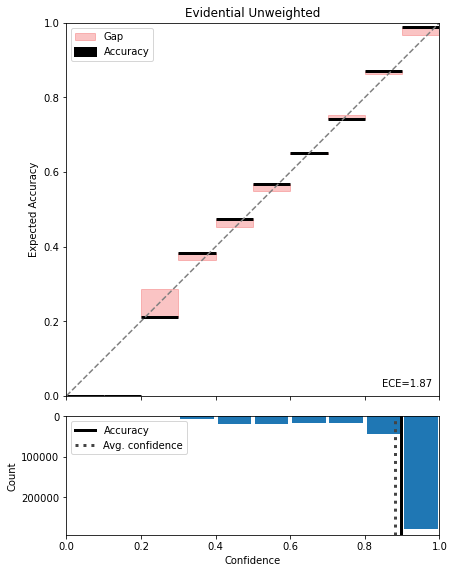

In [169]:
'''def reliability_diagrams(results, num_bins=10,
                         draw_ece=True, draw_bin_importance=False, 
                         num_cols=4, dpi=72, return_fig=False):'''


data = {"Evidential Weighted": {"true_labels":test_dataset['true_label'], "pred_labels":test_dataset['pred_label'],"confidences":test_dataset['pred_conf']}}
#reliability_diagrams(data, draw_bin_importance=True) check error 

reliability_diagram(truth, preds, conf, title= "Evidential Unweighted")

/glade/scratch/saavedrab/ipykernel_7828/2548688510.py:56: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors.values(), labels=["Rain", "Snow", "Ice Pellets", "Freezing Rain"], fontsize=24, markerscale=3)


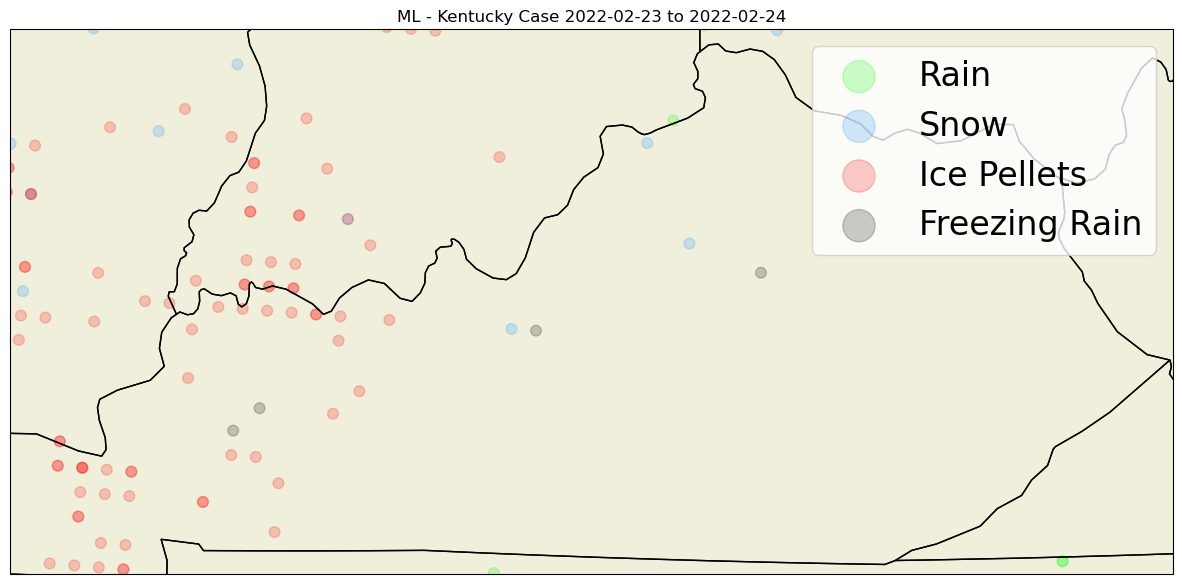

In [92]:
case_date = ["2022-02-23", "2022-02-24"]
regional_conus(39.15, 36.5,-89, -82, "ML - Kentucky Case ", 1, case_date)

/glade/scratch/saavedrab/ipykernel_7828/2548688510.py:56: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors.values(), labels=["Rain", "Snow", "Ice Pellets", "Freezing Rain"], fontsize=24, markerscale=3)


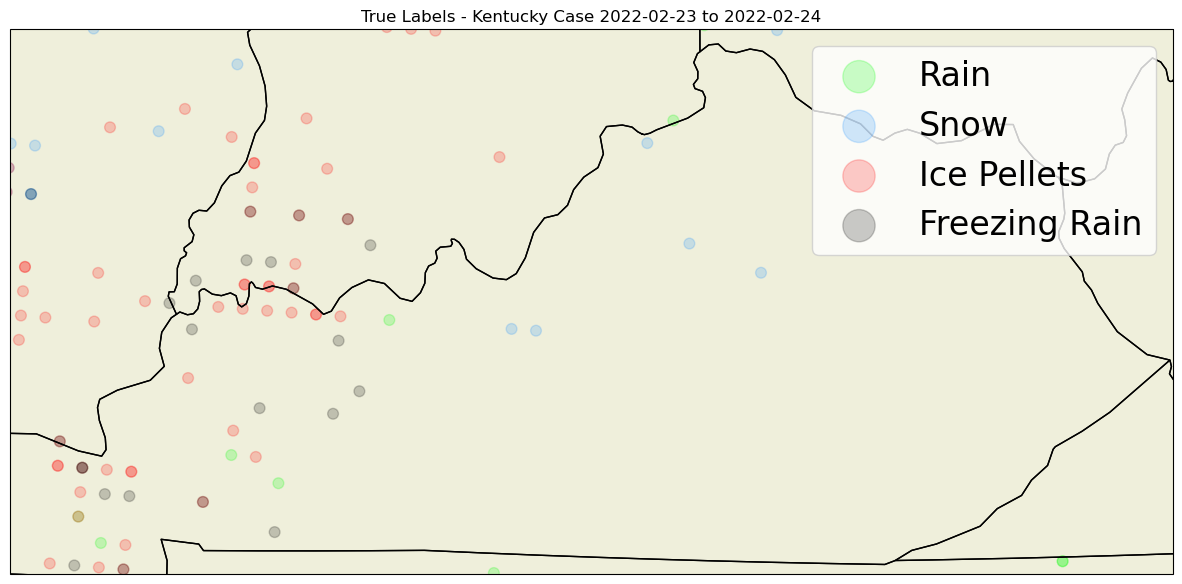

In [94]:
regional_conus(39.15, 36.5,-89, -82, "True Labels - Kentucky Case ", 0, case_date)

In [12]:
# New York 2:
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5

/glade/scratch/saavedrab/ipykernel_7828/502373145.py:59: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors.values(), labels=["Rain", "Snow", "Ice Pellets", "Freezing Rain"], fontsize=24, markerscale=3)


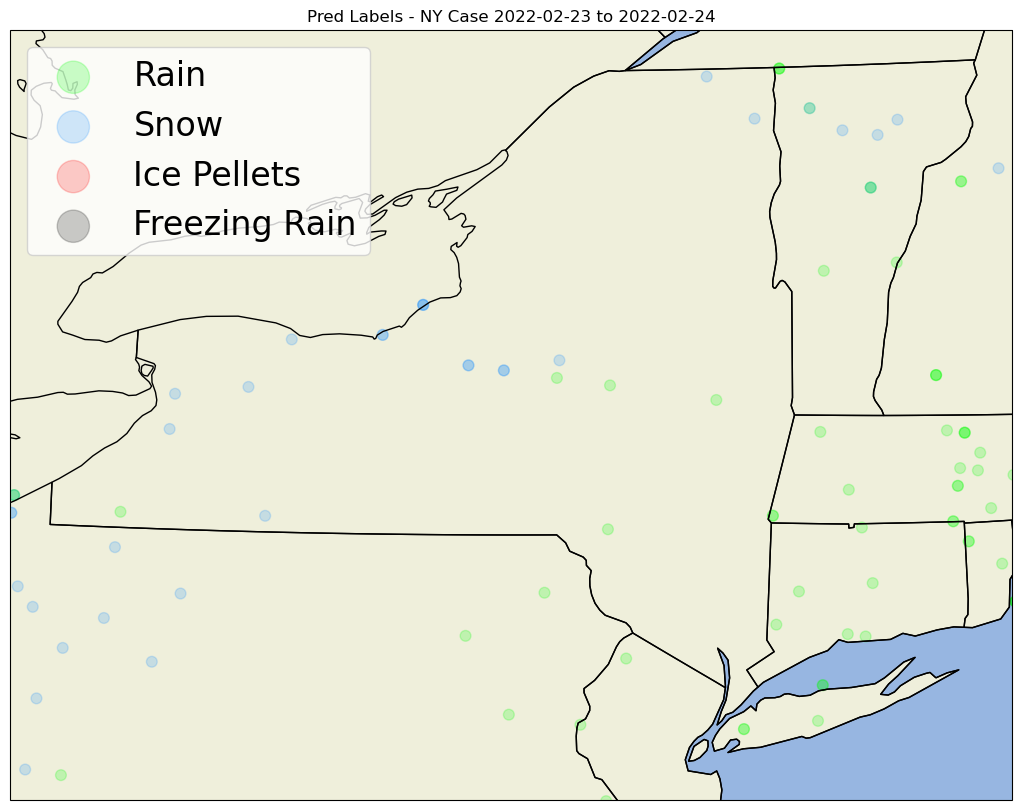

In [119]:
regional_conus(latN, latS,lonW, lonE, "Pred Labels - NY Case ", 1, case_date)

/glade/scratch/saavedrab/ipykernel_116588/502373145.py:59: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors.values(), labels=["Rain", "Snow", "Ice Pellets", "Freezing Rain"], fontsize=24, markerscale=3)


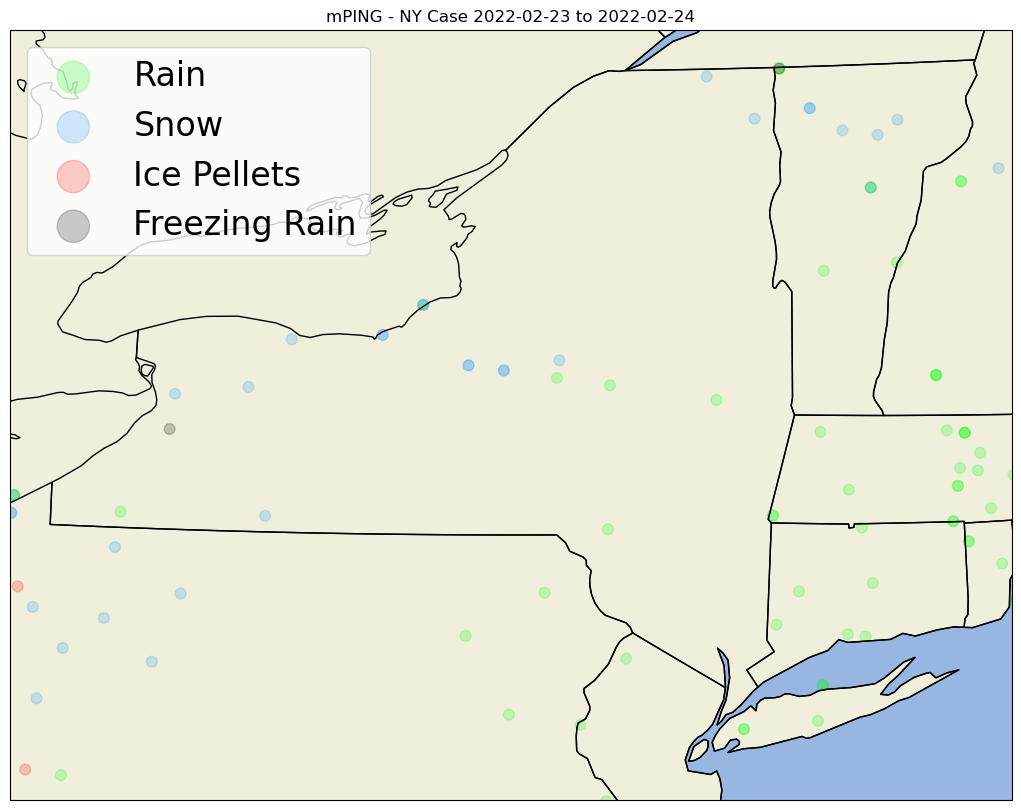

In [13]:
regional_conus(latN, latS,lonW, lonE, "mPING - NY Case ", 0, case_date)

## Conus - Evidential Unweighted 

In [15]:
# Sourcing data:

# Case study 1: 2022-02-23 & 2022-02-23 2022-02-24 ?
case_date = ["2022-02-23", "2022-02-24"]
sourcedata = test_dataset[(test_dataset['datetime'] >= case_date[0]) & (test_dataset['datetime'] <= case_date[1])]
sourcedata['datetime'].values

array(['2022-02-23T00:00:00.000000000', '2022-02-23T00:00:00.000000000',
       '2022-02-23T00:00:00.000000000', ...,
       '2022-02-24T00:00:00.000000000', '2022-02-24T00:00:00.000000000',
       '2022-02-24T00:00:00.000000000'], dtype='datetime64[ns]')

/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/ptype/plotting.py:269: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(


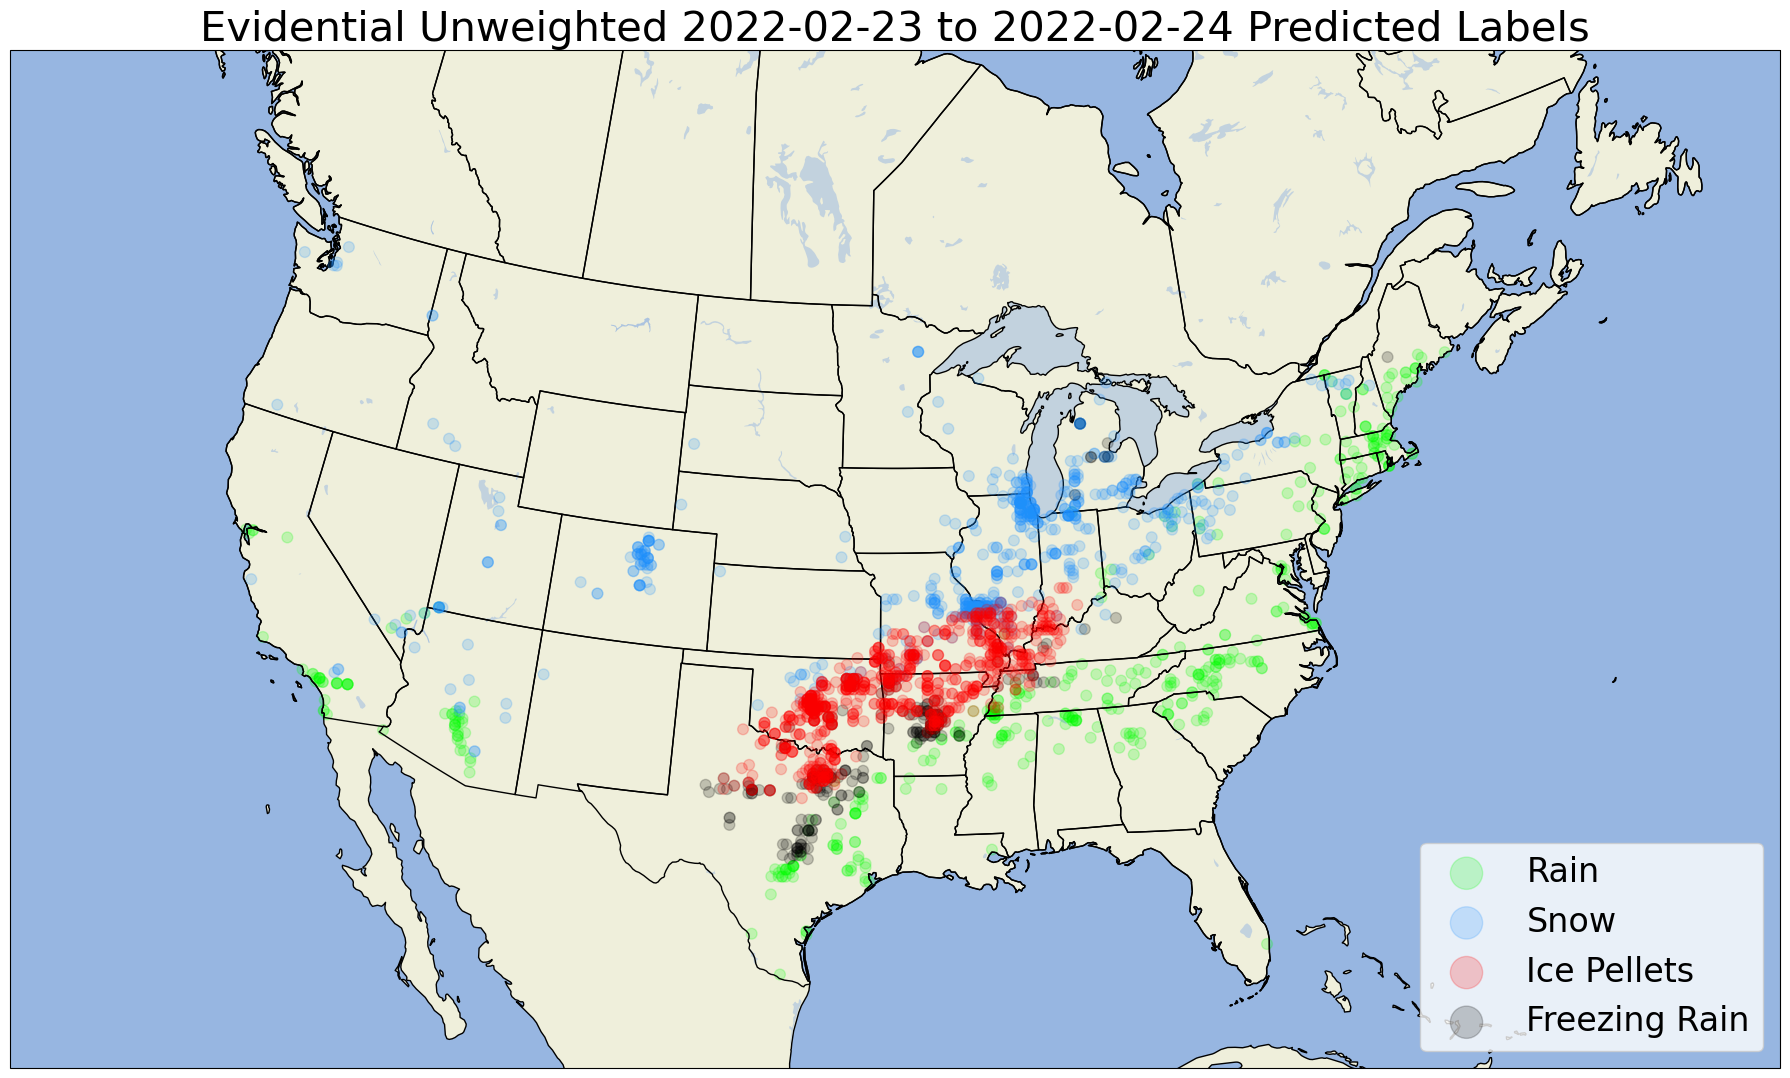

In [16]:
conus_plot(sourcedata, "Evidential Unweighted")

In [6]:
ds = { "Evidential Unweighted Train ": {"true_label": train_true_labels, "pred_label": train_pred_labels},
      "Evidential Unweighted Test": {"true_label": test_true_labels, "pred_label": test_pred_labels}, 
      "Evidential Unweighted Val": {"true_label": val_true_labels, "pred_label": val_pred_labels}
     }

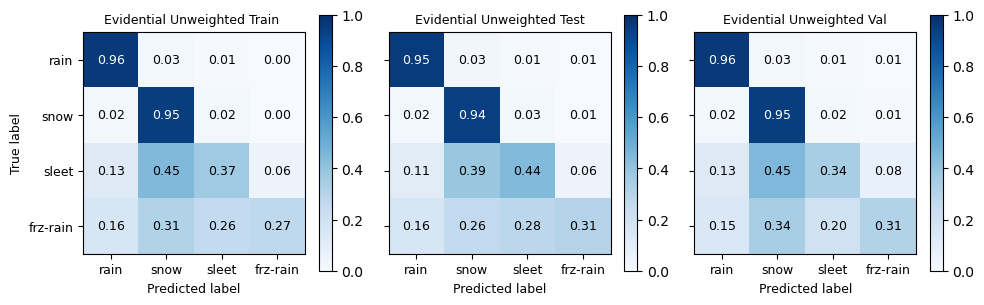

In [6]:
plot_confusion_matrix(ds, class_names, 9,True)

In [ ]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/evidential_unweighted/evaluate/"
data_files = ["train", "test", "val"]

for mod_num in range(20):
    #train dataset
    train_dataset = pd.read_parquet(join(path, f"train_{mod_num:d}.parquet"))
    train_pred_labels = np.append(train_pred_labels, train_dataset["pred_label"].values)
    train_true_labels =  np.append(train_true_labels, train_dataset["true_label"].values)
    
    #val dataset
    val_dataset = pd.read_parquet(join(path, f"val_{mod_num:d}.parquet"))
    val_pred_labels = np.append(val_pred_labels, val_dataset["pred_label"].values)
    val_true_labels =  np.append(val_true_labels, val_dataset["true_label"].values)
    
for mod_num in range (10):       
    #test dataset
    test_dataset = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))
    test_pred_labels = np.append(test_pred_labels, test_dataset["pred_label"].values)
    test_true_labels =  np.append(test_true_labels, test_dataset["true_label"].values)

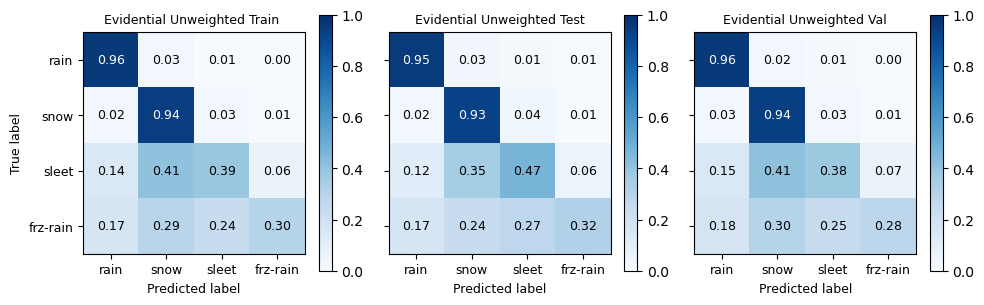

In [11]:
plot_confusion_matrix(ds, class_names, 9,True)

## Evidential Weighted (Single Ensemble)

In [176]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/evidential_weighted/evaluate/"
data_files = ["train", "test", "val"]
mod_num = 0

#train dataset
train_dataset = pd.read_parquet(join(path, f"train_{mod_num:d}.parquet"))
train_pred_labels = train_dataset["pred_label"].values
train_true_labels =  train_dataset["true_label"].values

#test dataset
test_dataset = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))
test_pred_labels = test_dataset["pred_label"].values
test_true_labels =  test_dataset["true_label"].values

#val dataset
val_dataset = pd.read_parquet(join(path, f"val_{mod_num:d}.parquet"))
val_pred_labels = val_dataset["pred_label"].values
val_true_labels =  val_dataset["true_label"].values

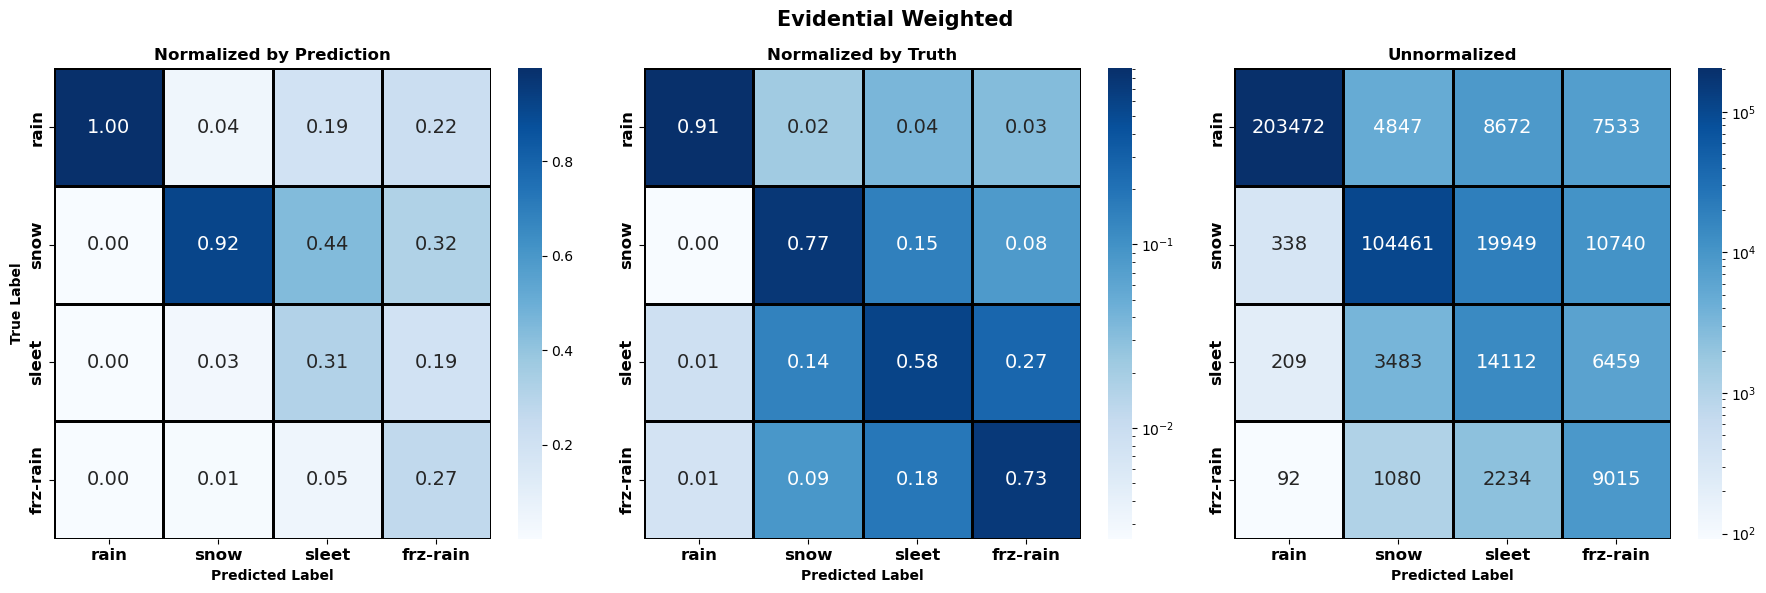

In [107]:
plot_3CM(test_true_labels,test_pred_labels, "Evidential Weighted", class_names )

In [177]:
conf = test_dataset["pred_conf"].values
truth = test_dataset["true_label"].values
preds = test_dataset["pred_label"].values

/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/ptype/reliability.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(new_ticks)


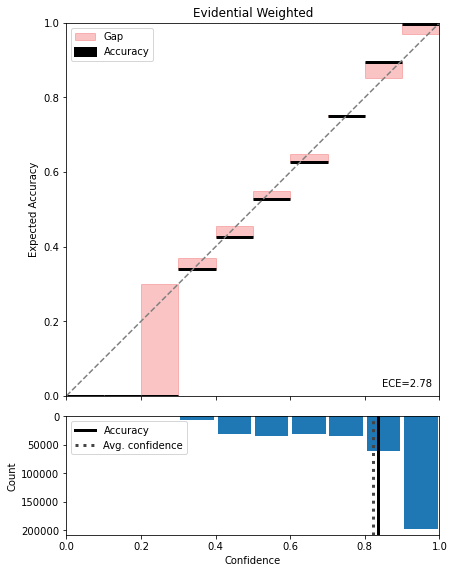

In [178]:
# reliability diagram 

reliability_diagram(truth, preds, conf, title= "Evidential Weighted")

## Conus - Evidential Weighted

In [158]:
# Sourcing data:
case_date = ["2022-02-23", "2022-02-24"]
sourcedata = test_dataset[(test_dataset['datetime'] >= case_date[0]) & (test_dataset['datetime'] <= case_date[1])]

In [ ]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/evidential_weighted/evaluate/"
data_files = ["train", "test", "val"]

for mod_num in range(20):
    #train dataset
    train_dataset = pd.read_parquet(join(path, f"train_{mod_num:d}.parquet"))
    train_pred_labels = np.append(train_pred_labels, train_dataset["pred_label"].values)
    train_true_labels =  np.append(train_true_labels, train_dataset["true_label"].values)
    
    #val dataset
    val_dataset = pd.read_parquet(join(path, f"val_{mod_num:d}.parquet"))
    val_pred_labels = np.append(val_pred_labels, val_dataset["pred_label"].values)
    val_true_labels =  np.append(val_true_labels, val_dataset["true_label"].values)
    
for mod_num in range (10):       
    #test dataset
    test_dataset = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))
    test_pred_labels = np.append(test_pred_labels, test_dataset["pred_label"].values)
    test_true_labels =  np.append(test_true_labels, test_dataset["true_label"].values)

## Classifier Weighted (Single Ensemble)

In [ ]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/classifier_weighted/evaluate/"
data_files = ["train", "test", "val"]
mod_num = 0

#train dataset
train_dataset = pd.read_parquet(join(path, f"train_{mod_num:d}.parquet"))
train_pred_labels = train_dataset["pred_label"].values
train_true_labels =  train_dataset["true_label"].values

#test dataset
test_dataset = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))
test_pred_labels = test_dataset["pred_label"].values
test_true_labels =  test_dataset["true_label"].values

#val dataset
val_dataset = pd.read_parquet(join(path, f"val_{mod_num:d}.parquet"))
val_pred_labels = val_dataset["pred_label"].values
val_true_labels =  val_dataset["true_label"].values

In [5]:
# Prediction: 
pred= test_dataset['CRAIN'].values.flatten() 
pred = np.zeros(shape=pred.shape) 

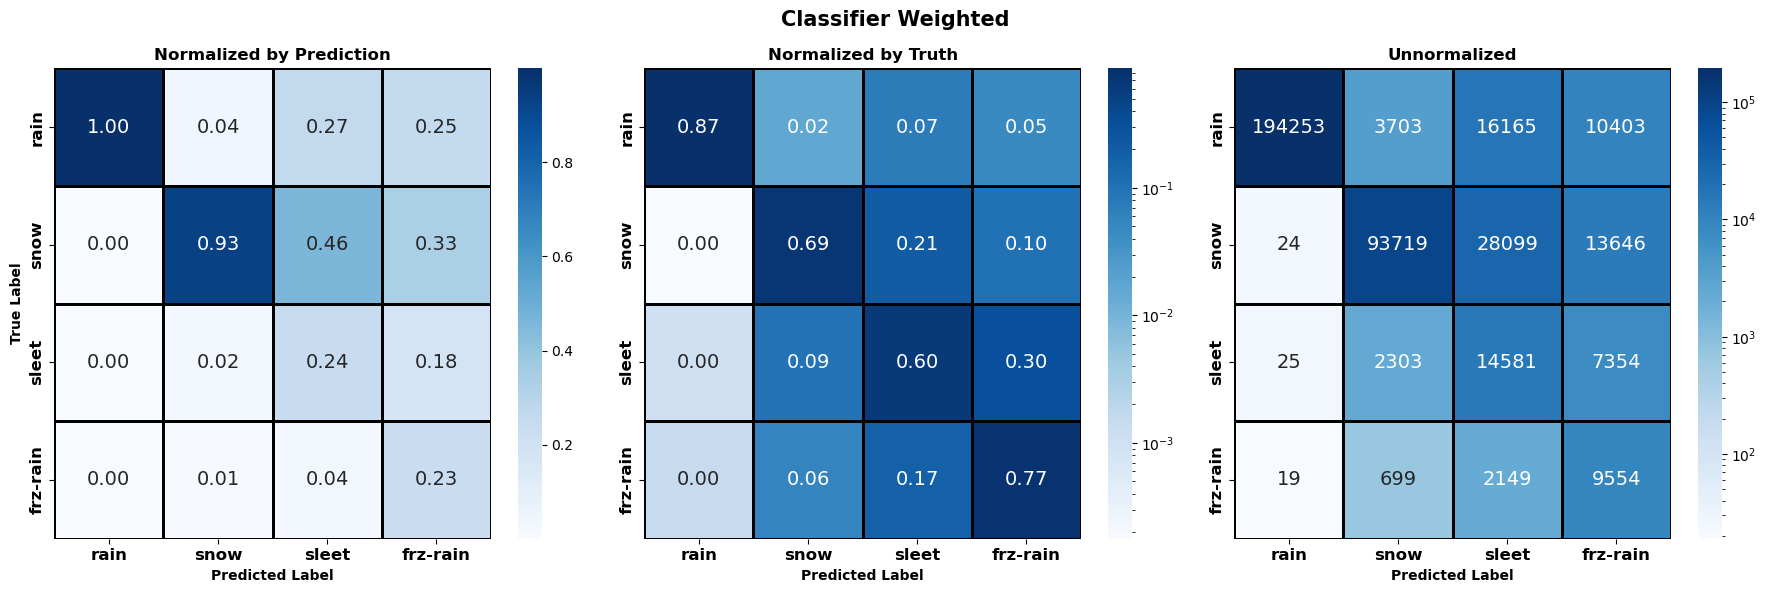

In [105]:
plot_3CM(test_true_labels,test_pred_labels, "Classifier Weighted", class_names )

In [181]:
conf = test_dataset["pred_conf"].values
truth = test_dataset["true_label"].values
preds = test_dataset["pred_label"].values

/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/ptype/reliability.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(new_ticks)


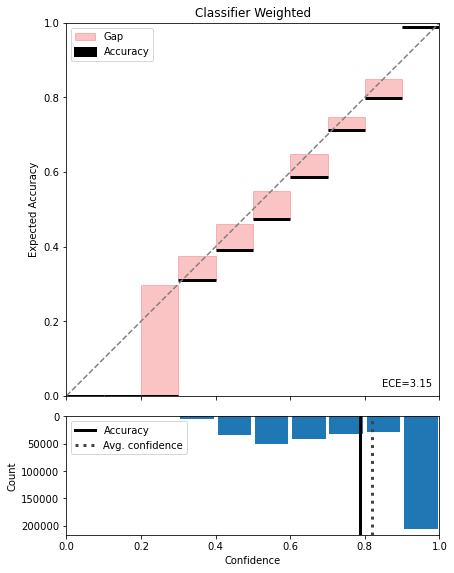

In [182]:
# reliability diagram 

reliability_diagram(truth, preds, conf, title= "Classifier Weighted")

In [ ]:
# conus 

## Conus - Classifier Weighted

In [161]:
case_date = ["2022-02-23", "2022-02-24"]
sourcedata = test_dataset[(test_dataset['datetime'] >= case_date[0]) & (test_dataset['datetime'] <= case_date[1])]

/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/ptype/plotting.py:269: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(


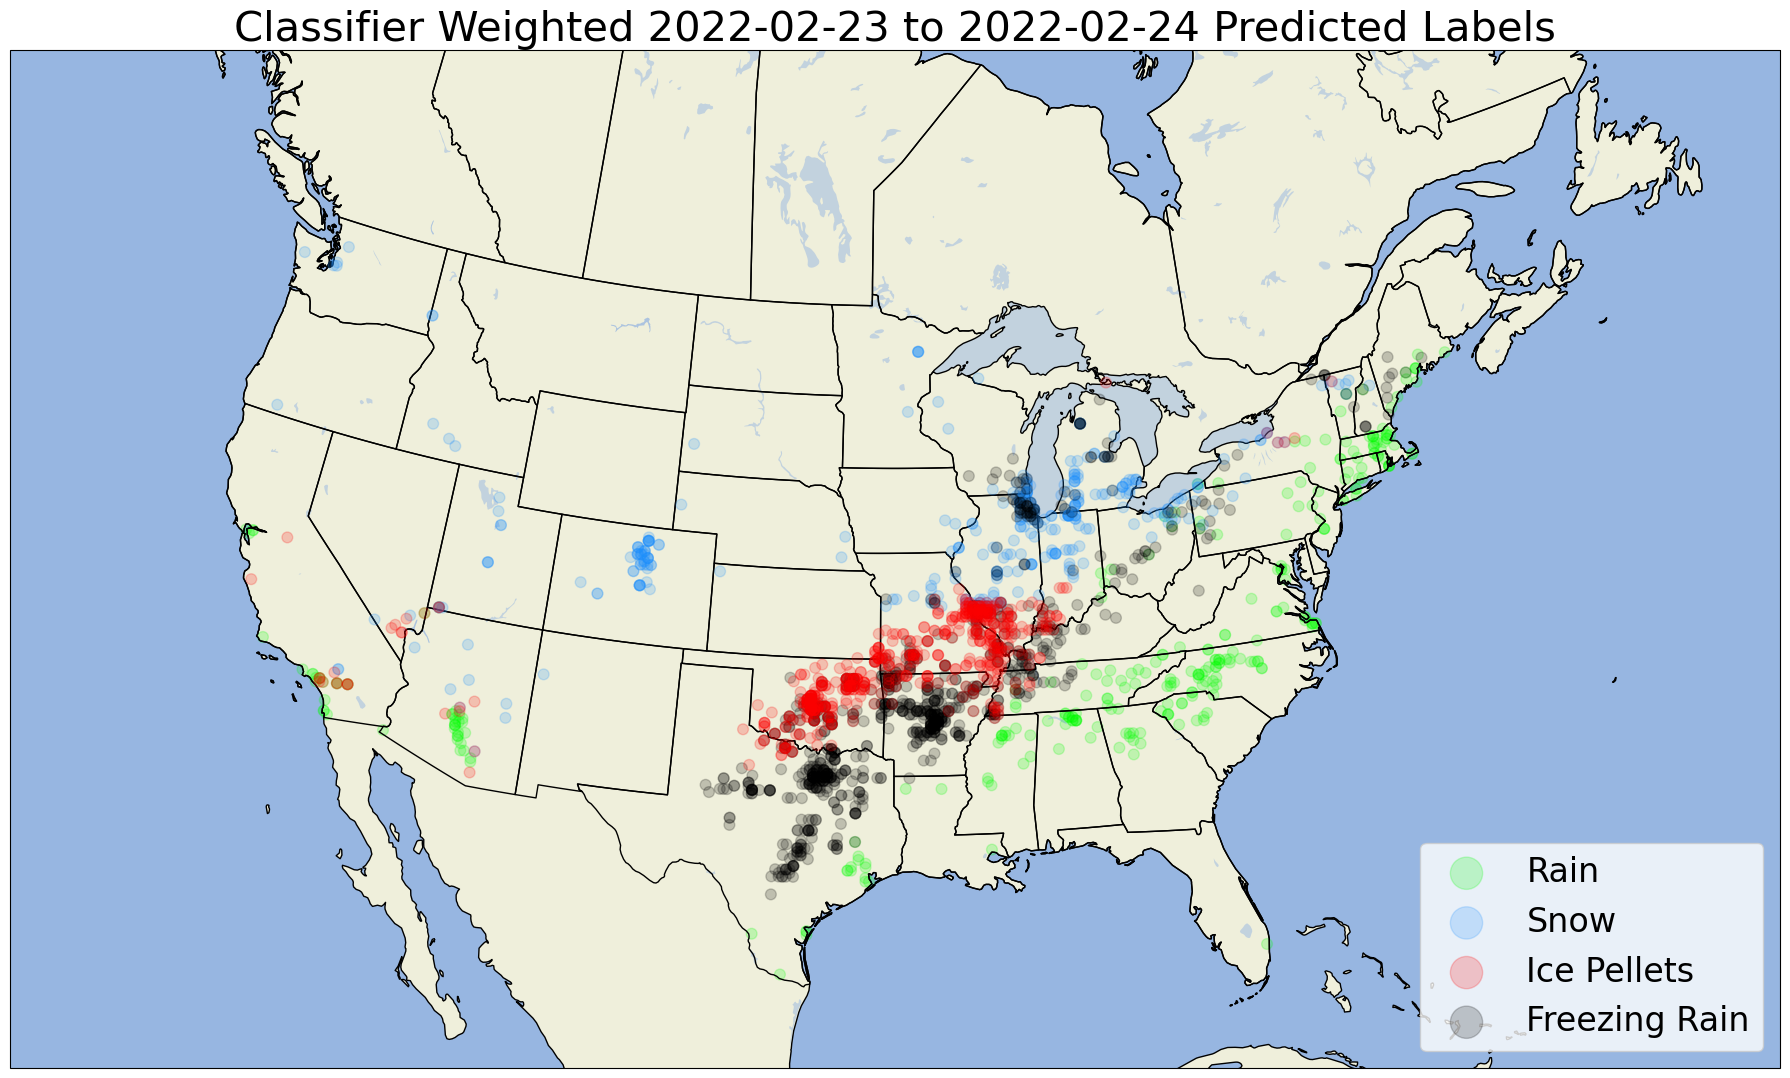

In [162]:
conus_plot(sourcedata, "Classifier Weighted")

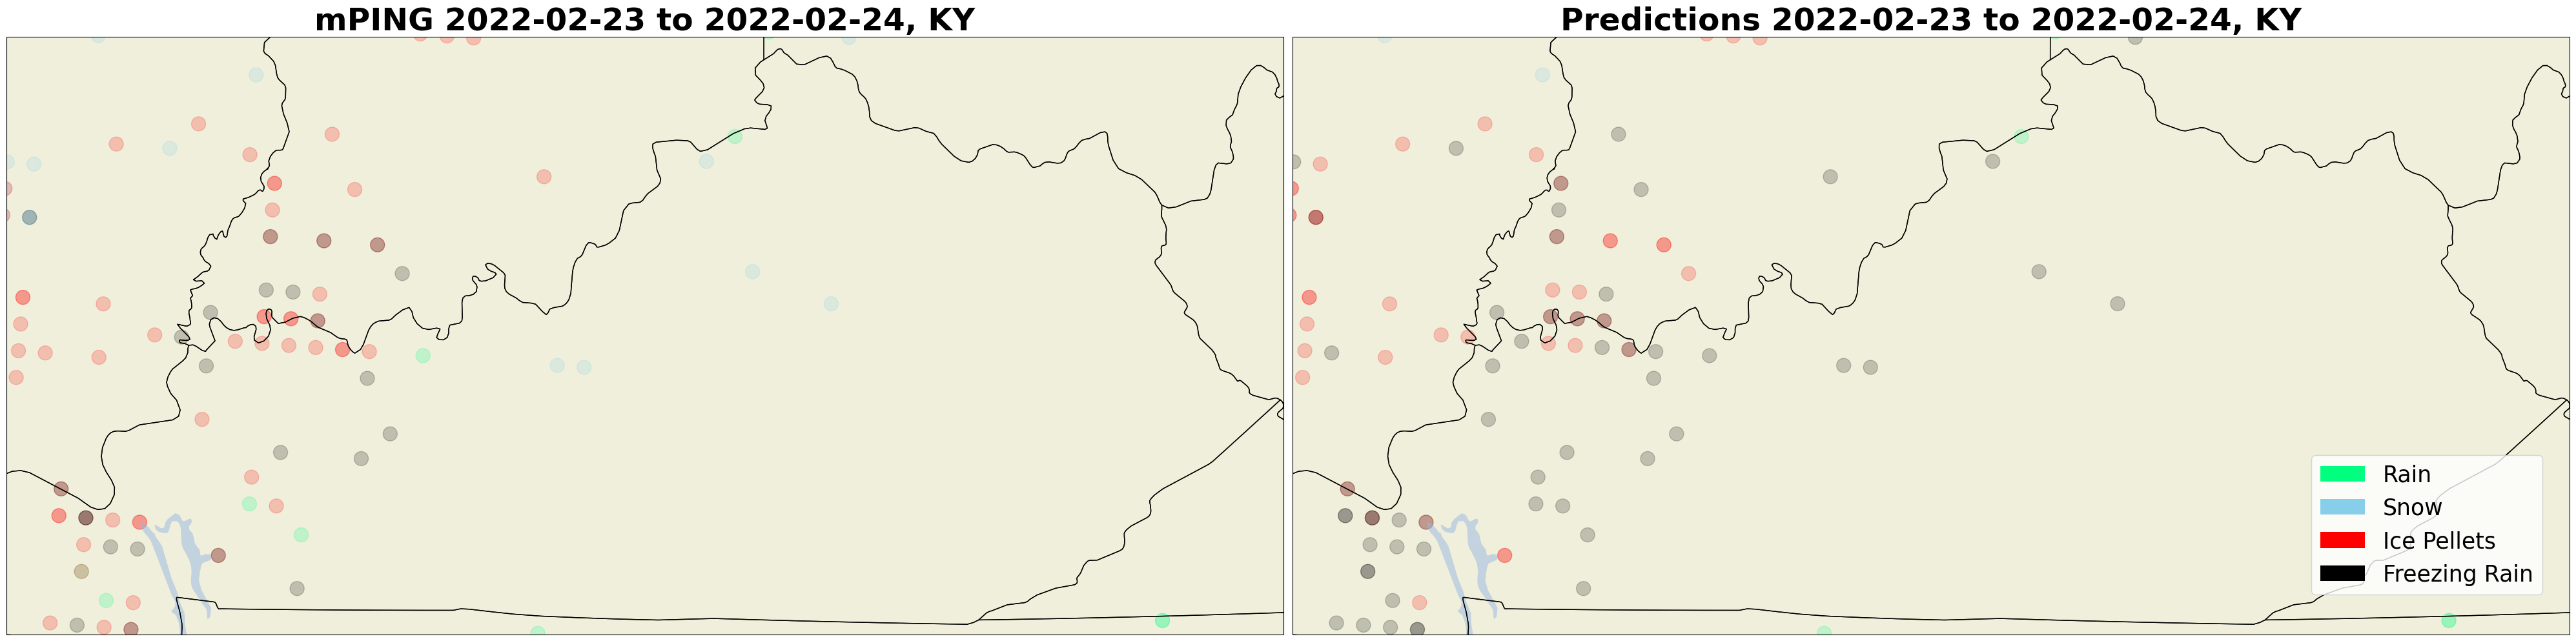

In [377]:
case_date = ["2022-02-23", "2022-02-24"]
case = "KY" 
regional_CONUS(39.15, 36.5,-89, -82, case, case_dates)

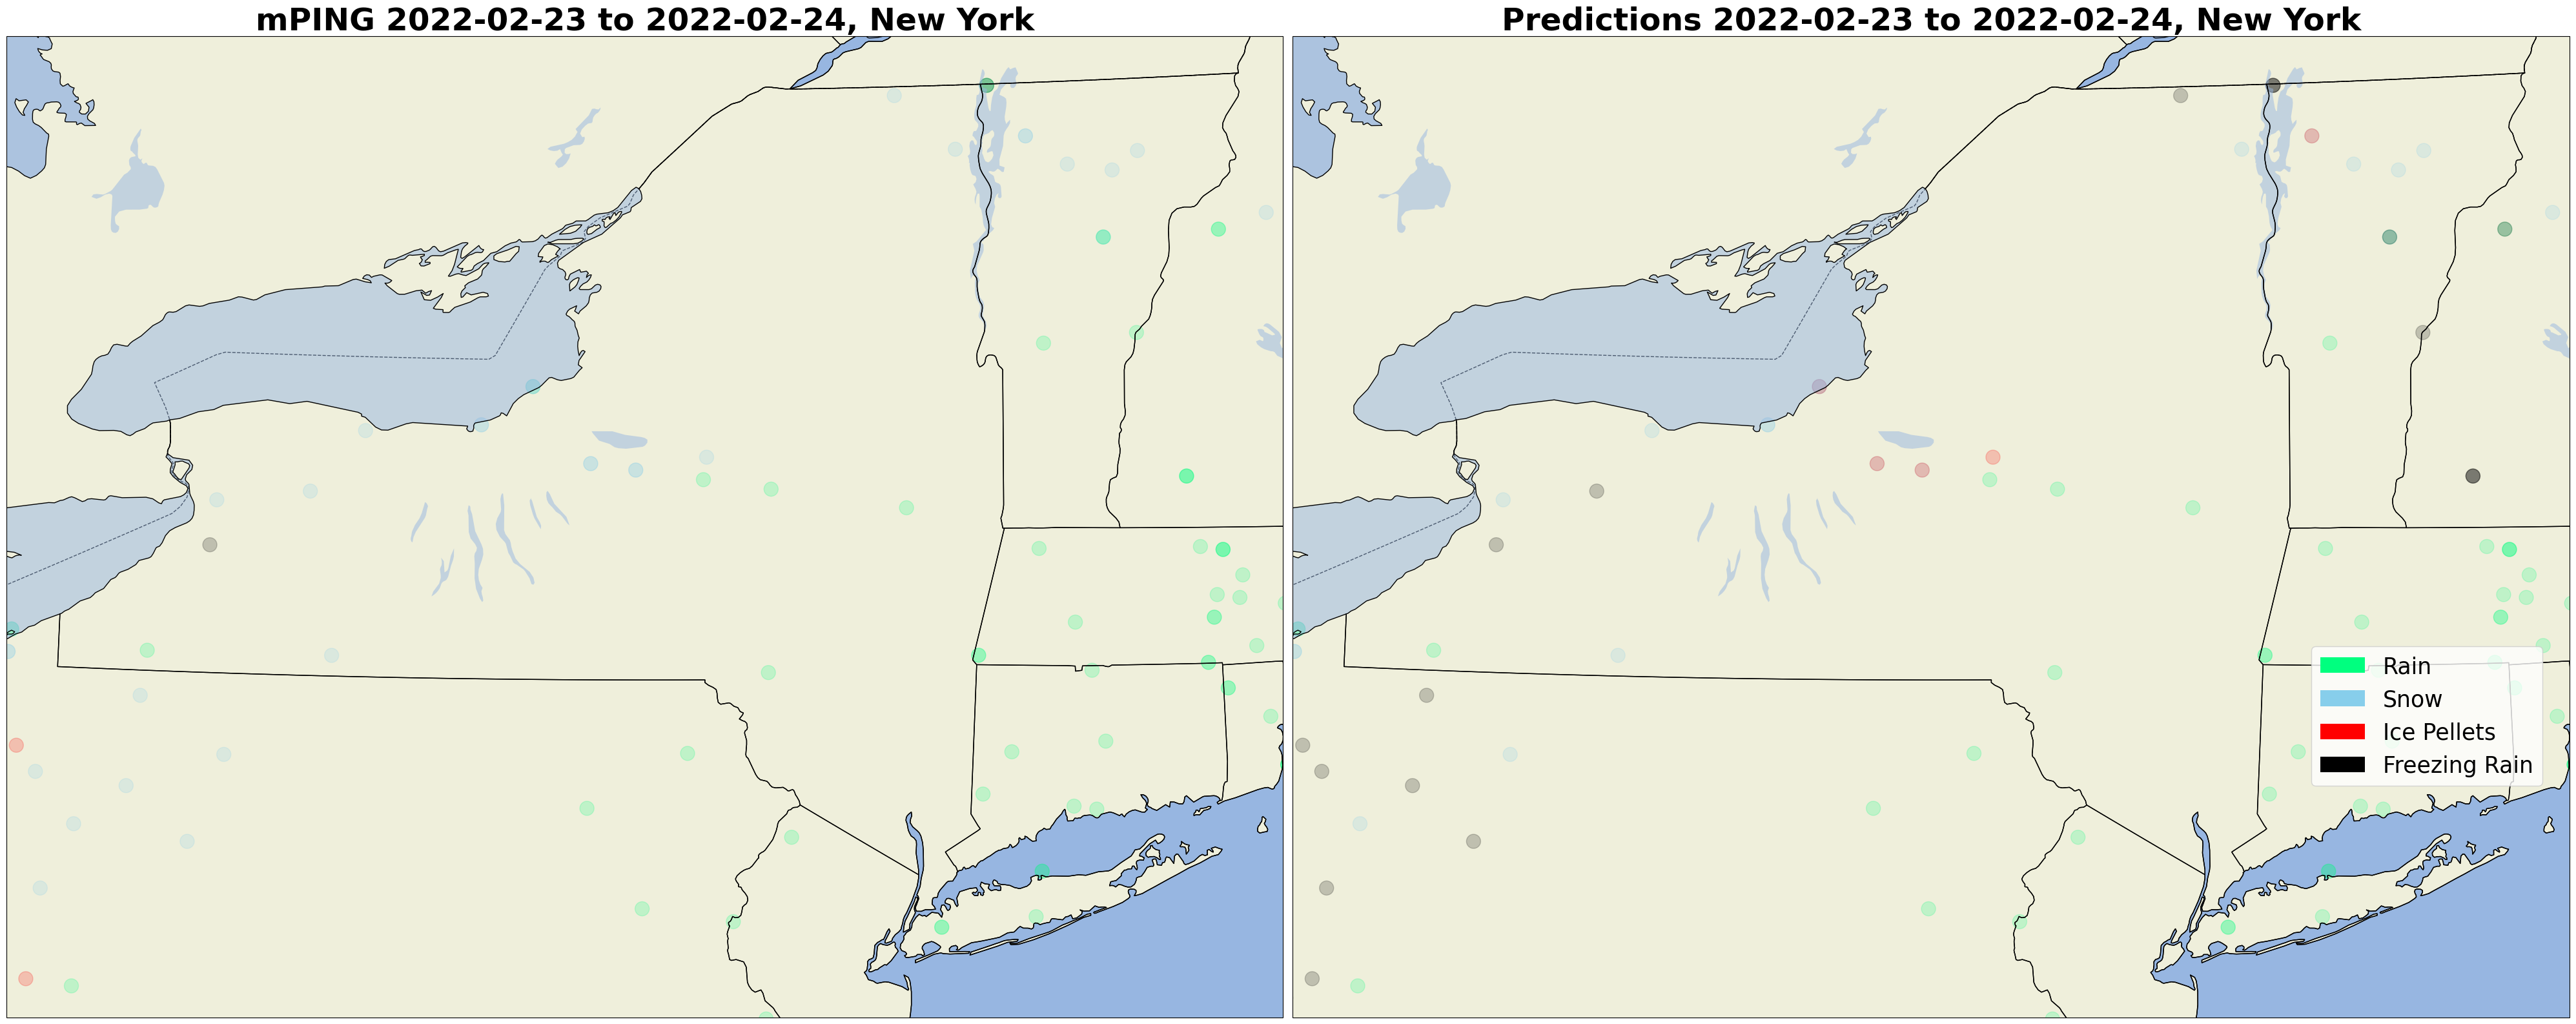

In [266]:
#New York 
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5


case_date = ["2022-02-23", "2022-02-24"]
case = "New York" 
regional_CONUS(latN,latS,lonW, lonE, case, case_dates)



/glade/scratch/saavedrab/ipykernel_116588/502373145.py:59: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors.values(), labels=["Rain", "Snow", "Ice Pellets", "Freezing Rain"], fontsize=24, markerscale=3)


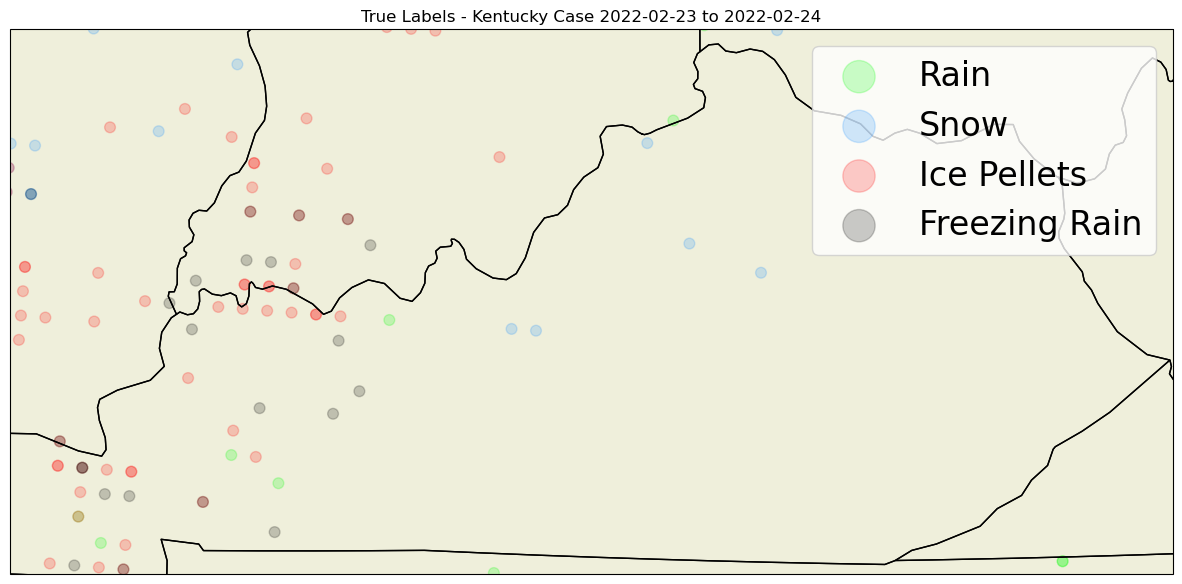

In [9]:
case_date = ["2022-02-23", "2022-02-24"]
regional_conus(39.15, 36.5,-89, -82, "True Labels - Kentucky Case ", 0, case_date)

/glade/scratch/saavedrab/ipykernel_116588/231472231.py:71: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors.values(), labels=["Rain", "Snow", "Ice Pellets", "Freezing Rain"], fontsize=24, markerscale=3)


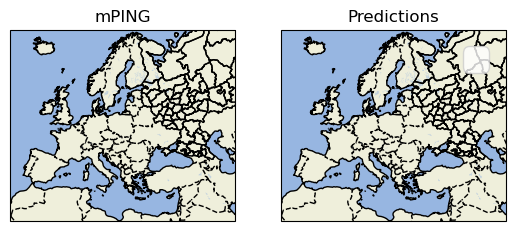

In [61]:
regional_CONUS()

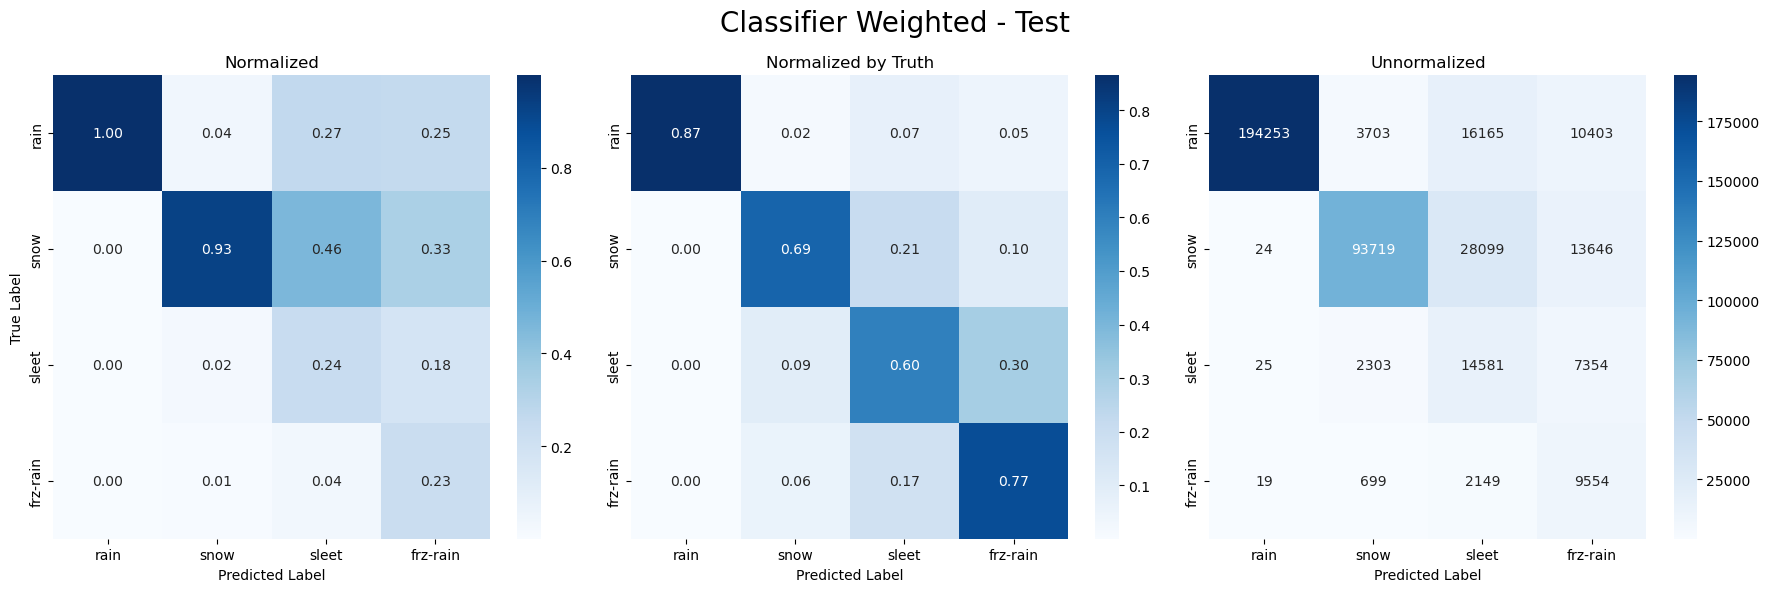

In [129]:
plotting_CM(test_true_labels, test_pred_labels, "Classifier Weighted - Test", class_names)

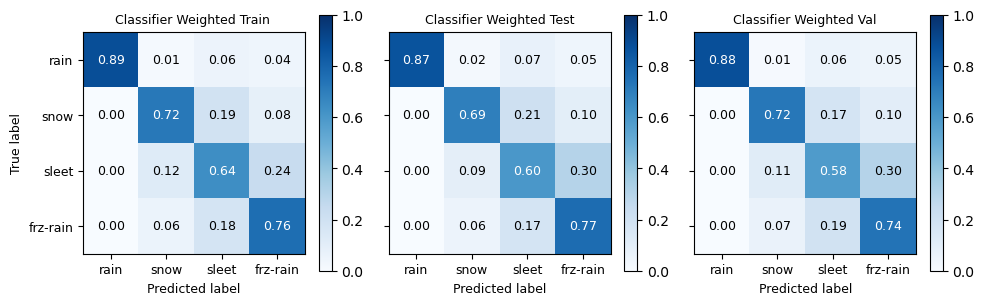

In [10]:
plot_confusion_matrix(ds, class_names, 9,True)

## Classifier unWeighted (Single Ensemble)

In [267]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/classifier_unweighted/evaluate/"
data_files = ["train", "test", "val"]
mod_num = 0

#train dataset
train_dataset = pd.read_parquet(join(path, f"train_{mod_num:d}.parquet"))
train_pred_labels = train_dataset["pred_label"].values
train_true_labels =  train_dataset["true_label"].values

#test dataset
test_dataset = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))
test_pred_labels = test_dataset["pred_label"].values
test_true_labels =  test_dataset["true_label"].values

#val dataset
val_dataset = pd.read_parquet(join(path, f"val_{mod_num:d}.parquet"))
val_pred_labels = val_dataset["pred_label"].values
val_true_labels =  val_dataset["true_label"].values

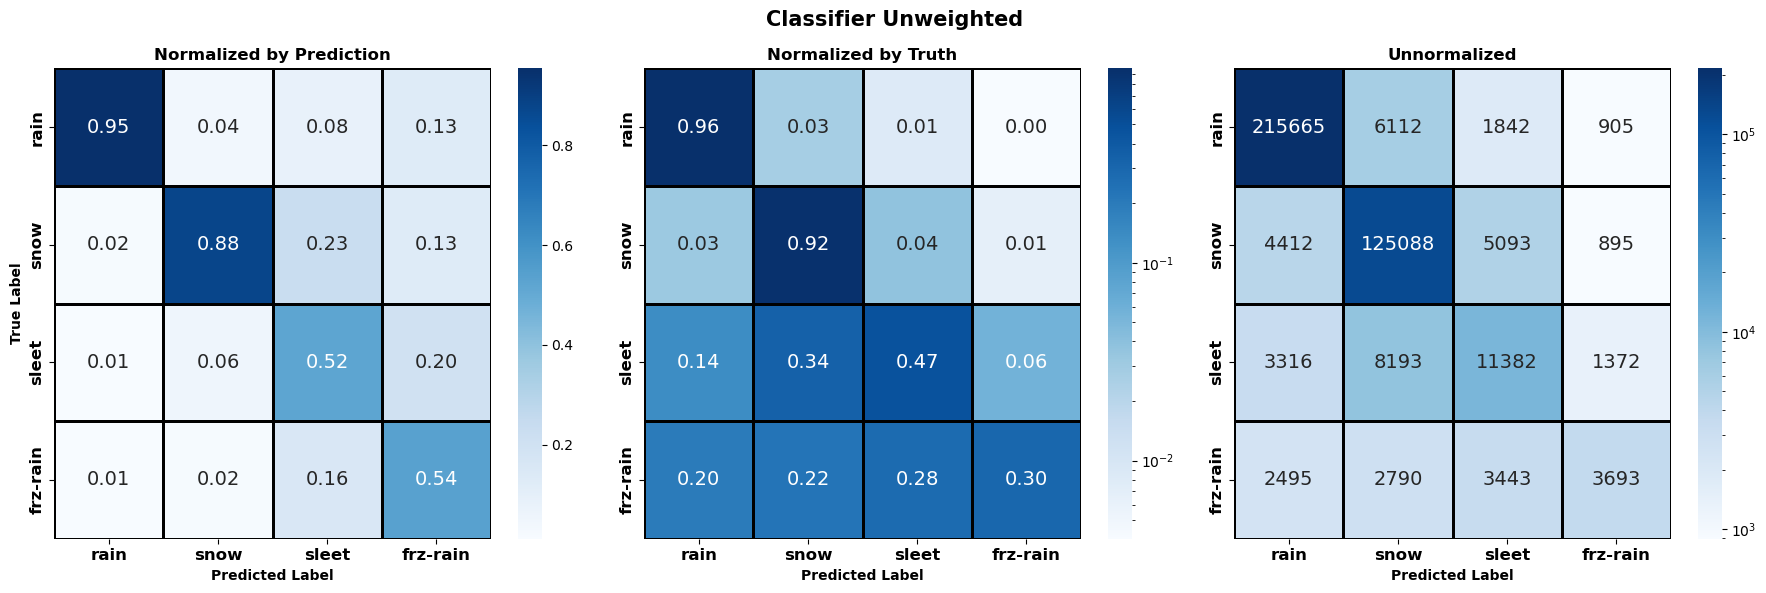

In [92]:
plot_3CM(test_true_labels,test_pred_labels, "Classifier Unweighted", class_names )

In [187]:
conf = test_dataset["pred_conf"].values
truth = test_dataset["true_label"].values
preds = test_dataset["pred_label"].values

/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/ptype/reliability.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(new_ticks)


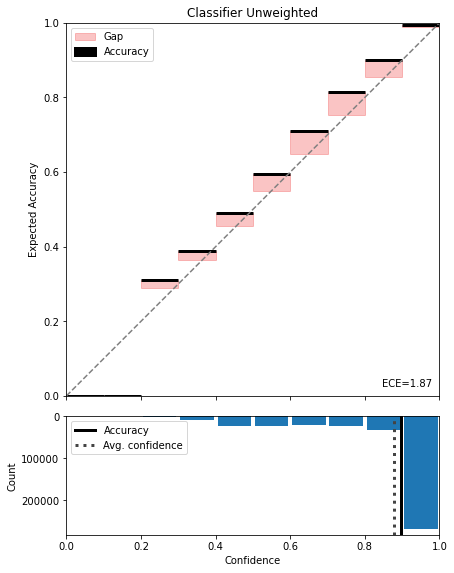

In [188]:
# reliability diagram 

reliability_diagram(truth, preds, conf, title= "Classifier Unweighted")

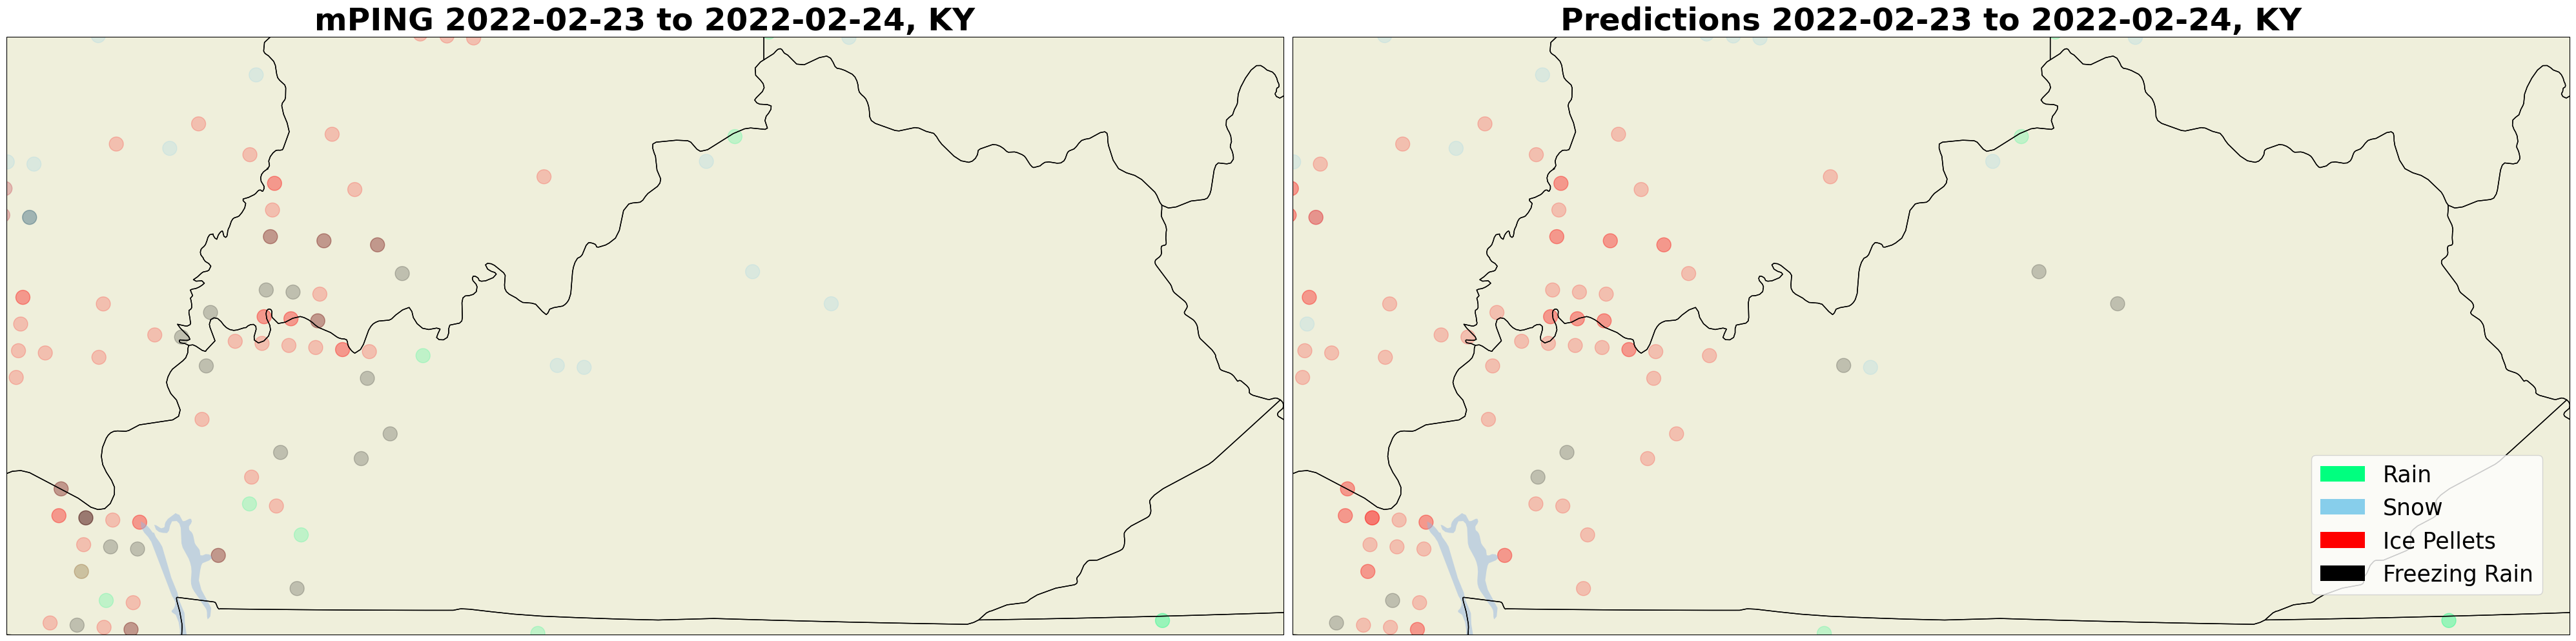

In [262]:
case_date = ["2022-02-23", "2022-02-24"]
case = "KY" 
regional_CONUS(39.15, 36.5,-89, -82, case, case_dates)

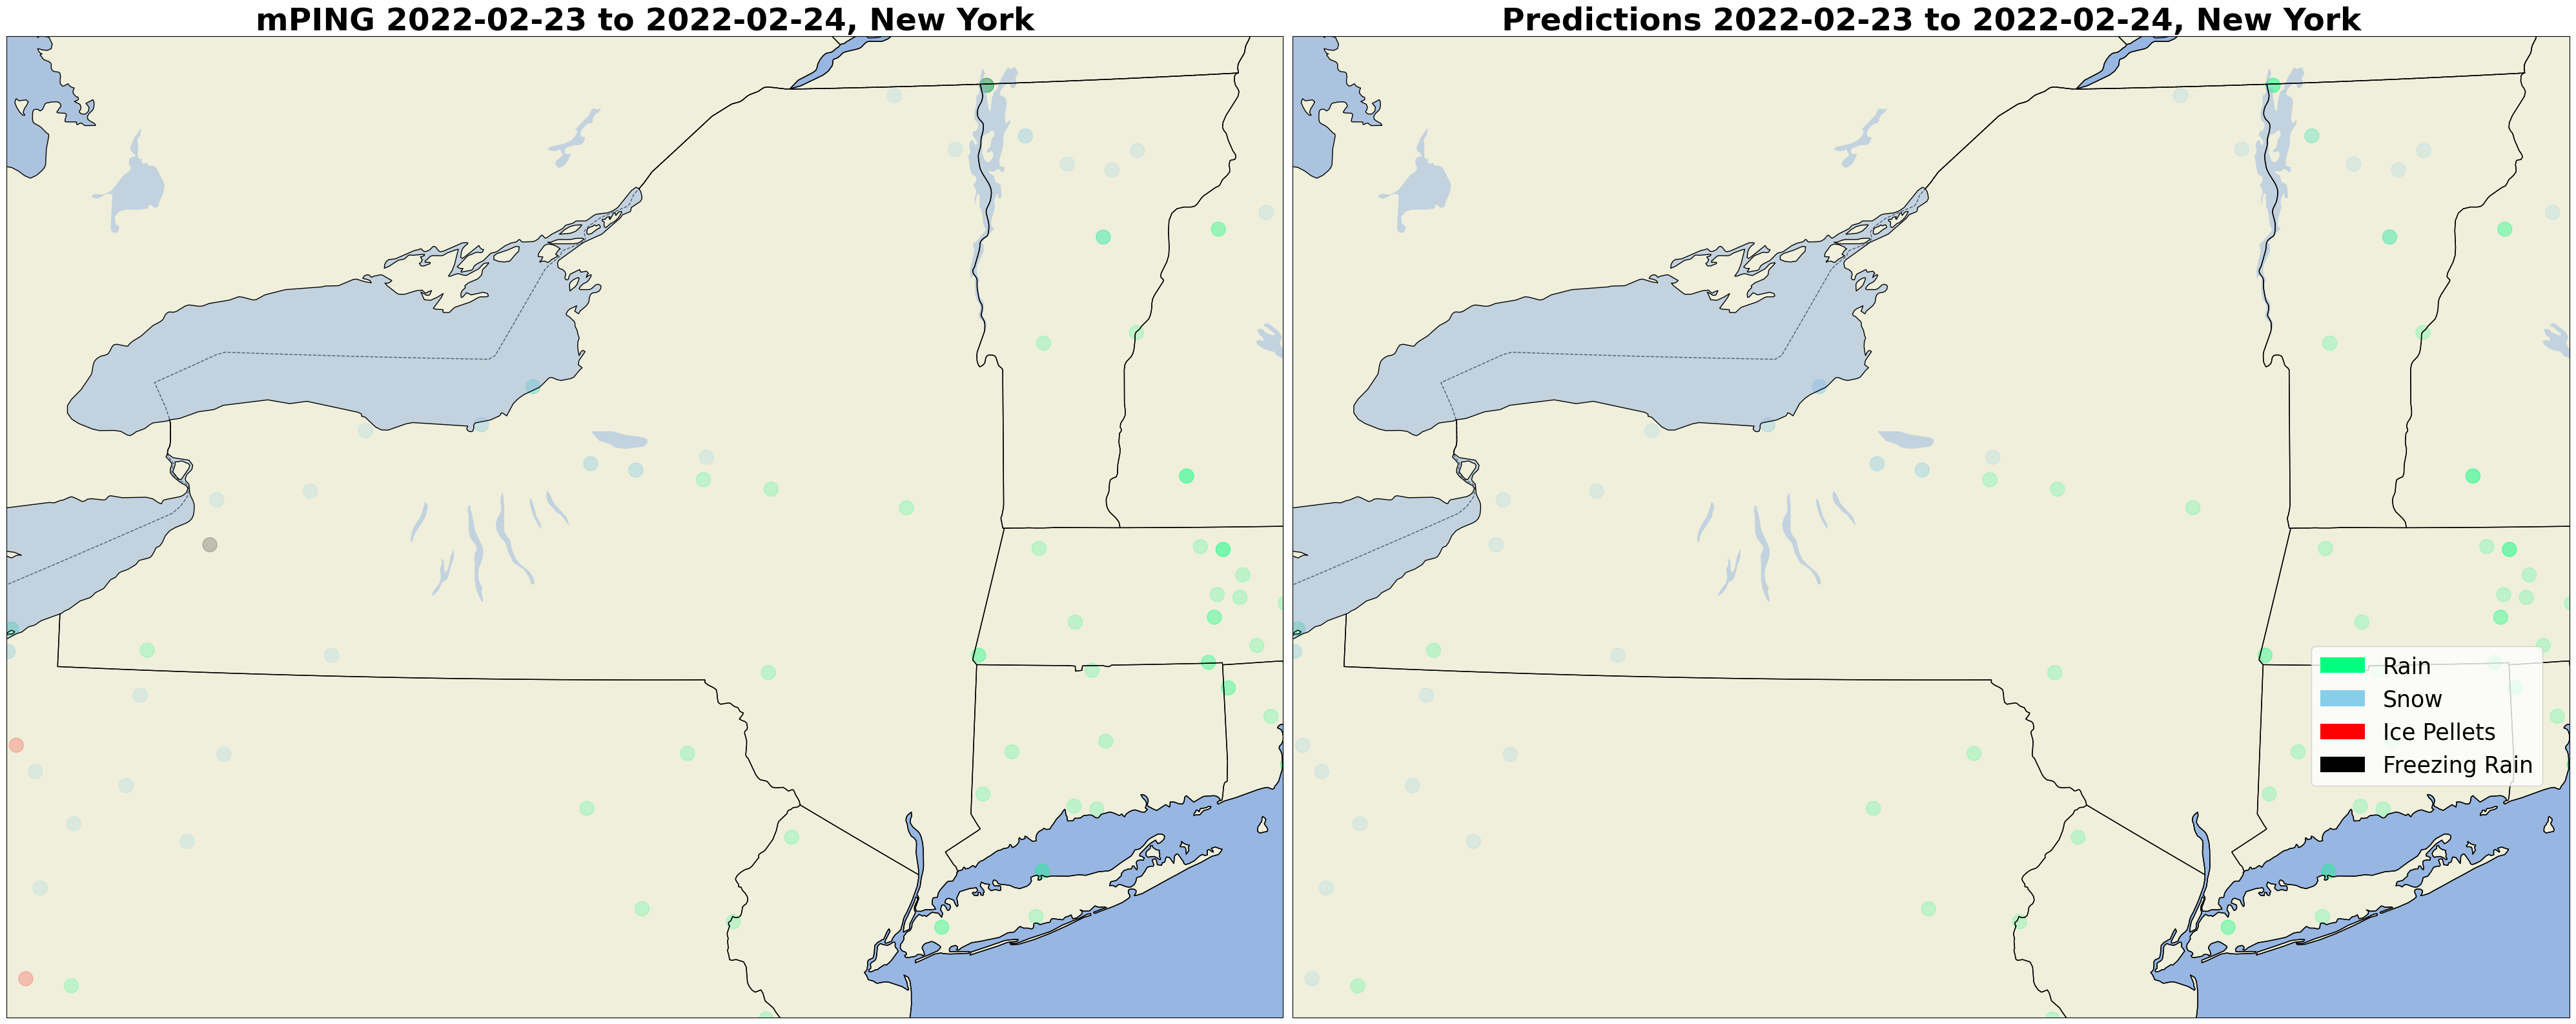

In [268]:
#New York 
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5


case_date = ["2022-02-23", "2022-02-24"]
case = "New York" 
regional_CONUS(latN,latS,lonW, lonE, case, case_dates)

## Conus - Classifier Unweighted


In [169]:
case_date = ["2022-02-23", "2022-02-24"]
sourcedata = test_dataset[(test_dataset['datetime'] >= case_date[0]) & (test_dataset['datetime'] <= case_date[1])]

/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/ptype/plotting.py:269: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(


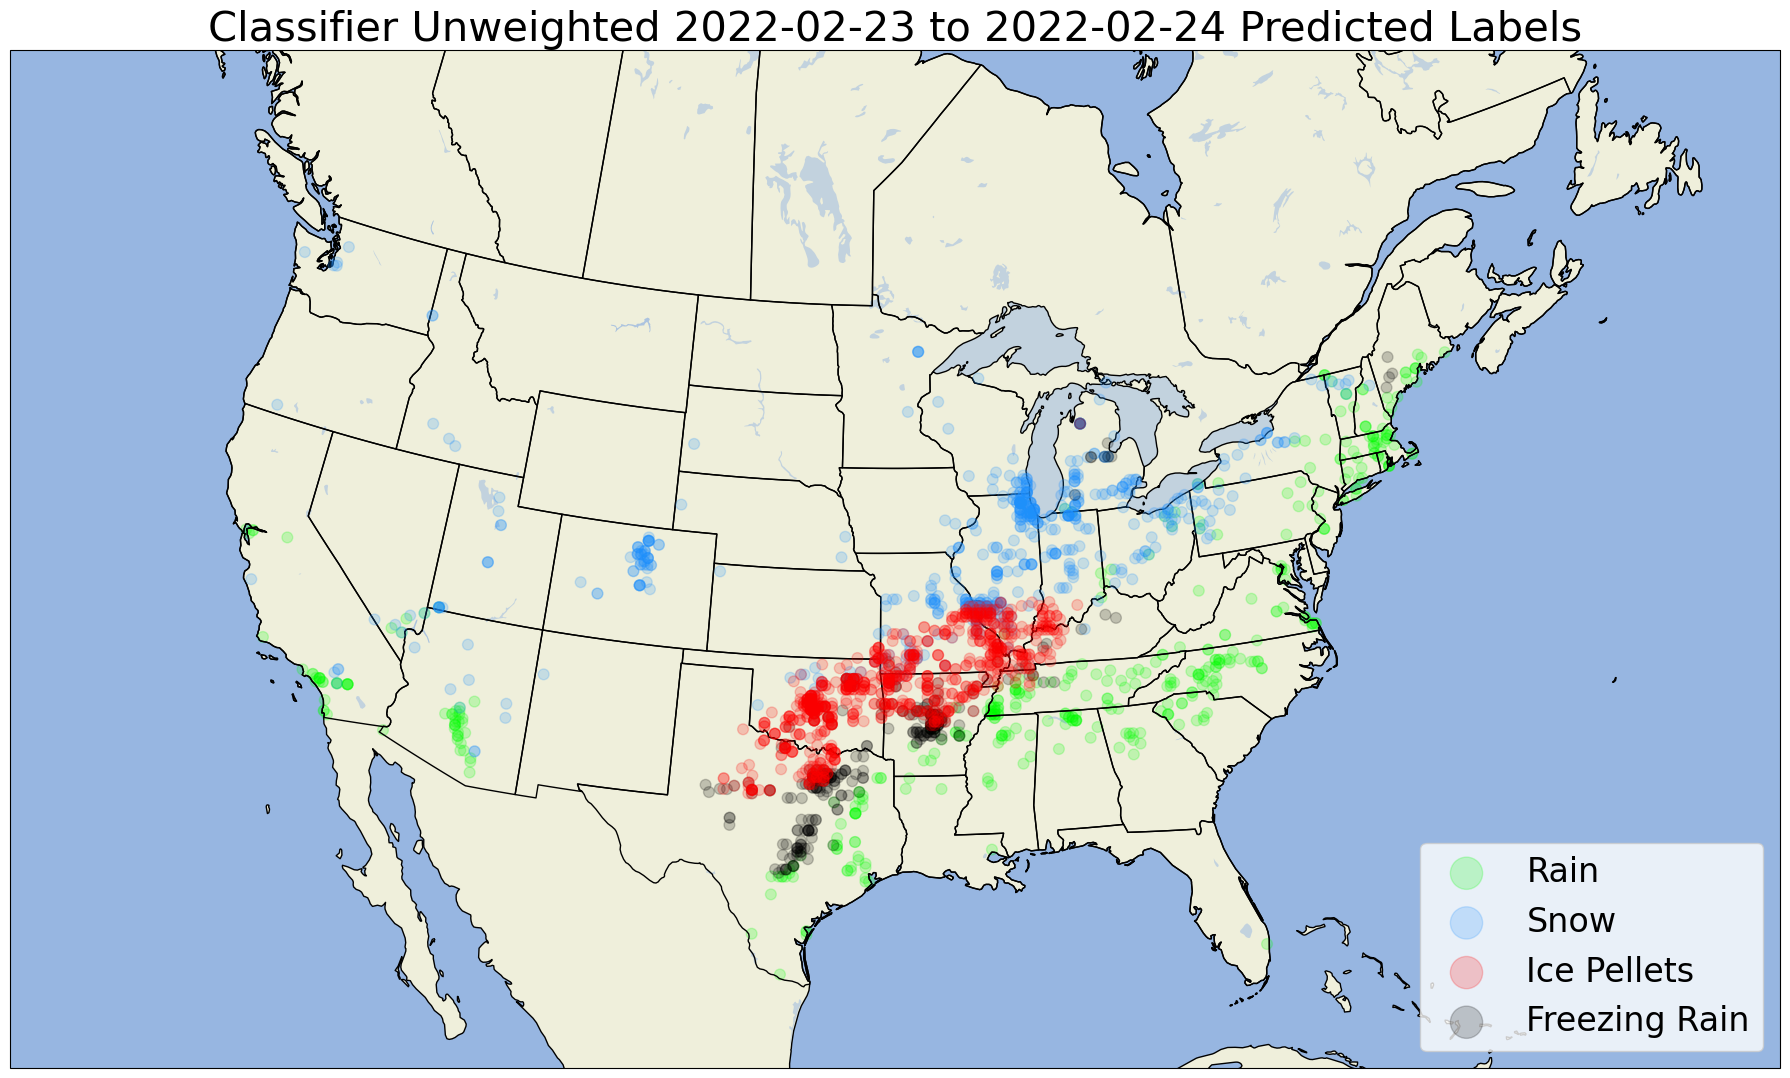

In [170]:
conus_plot(sourcedata, "Classifier Unweighted")

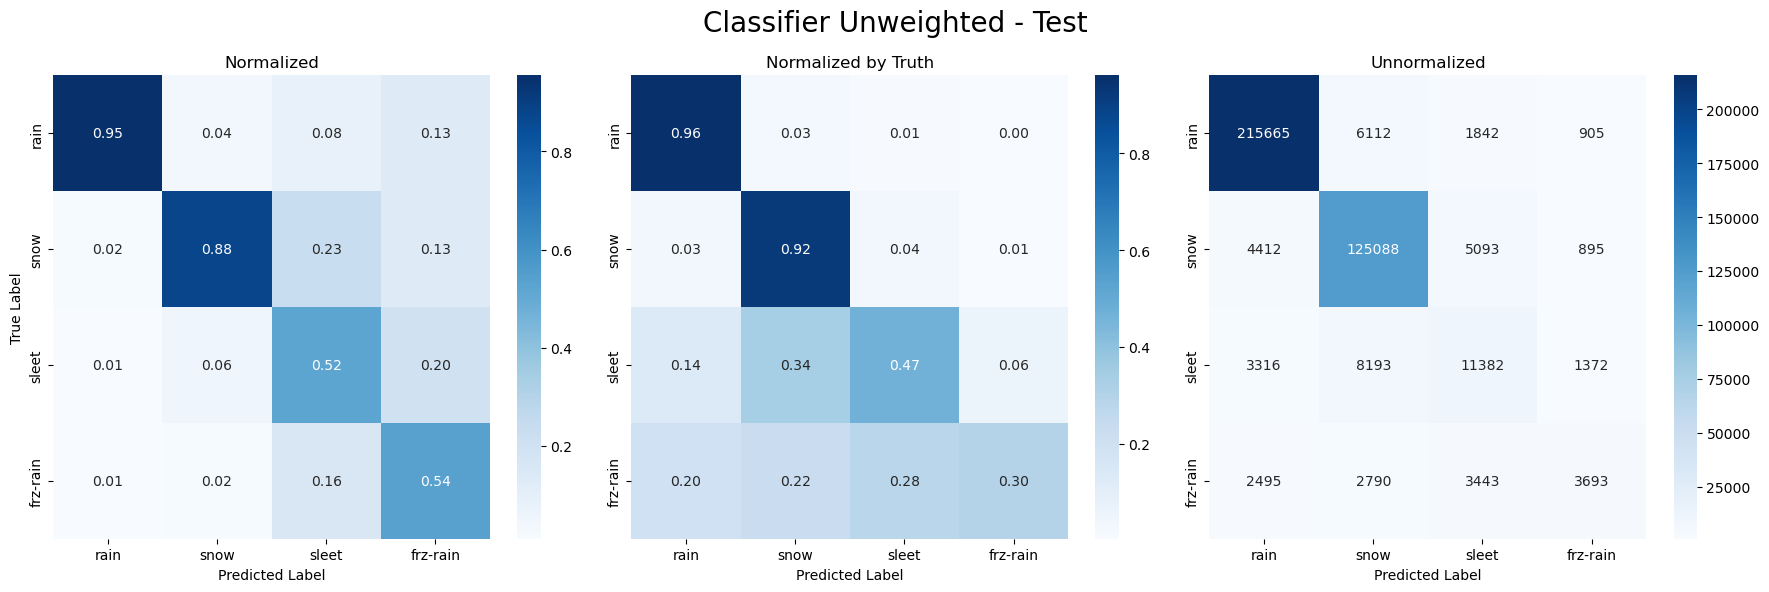

In [132]:
plotting_CM(test_true_labels, test_pred_labels, "Classifier Unweighted - Test", class_names)

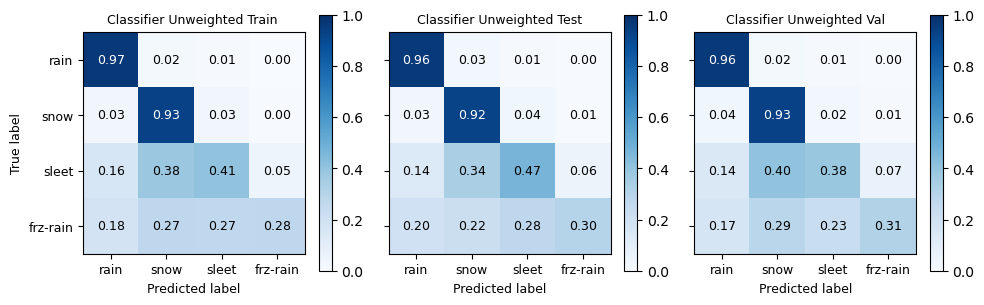

In [22]:
plot_confusion_matrix(ds, class_names, 9,True)

In [ ]:
plot_confusion_matrix(ds, class_names, 9)

In [10]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/classifier_weighted/evaluate/"
data_files = ["train", "test", "val"]

for mod_num in range(20):
    #train dataset
    train_dataset = pd.read_parquet(join(path, f"train_{mod_num:d}.parquet"))
    train_pred_labels = np.append(train_pred_labels, train_dataset["pred_label"].values)
    train_true_labels =  np.append(train_true_labels, train_dataset["true_label"].values)
    
    #val dataset
    val_dataset = pd.read_parquet(join(path, f"val_{mod_num:d}.parquet"))
    val_pred_labels = np.append(val_pred_labels, val_dataset["pred_label"].values)
    val_true_labels =  np.append(val_true_labels, val_dataset["true_label"].values)
       
    #test dataset
    test_dataset = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))
    test_pred_labels = np.append(test_pred_labels, test_dataset["pred_label"].values)
    test_true_labels =  np.append(test_true_labels, test_dataset["true_label"].values)

In [11]:
ds = { "Classifier Weighted Train ": {"true_label": train_true_labels, "pred_label": train_pred_labels},
      "Classifier Weighted Test": {"true_label": test_true_labels, "pred_label": test_pred_labels}, 
      "Classifier Weighted Val": {"true_label": val_true_labels, "pred_label": val_pred_labels}
     }

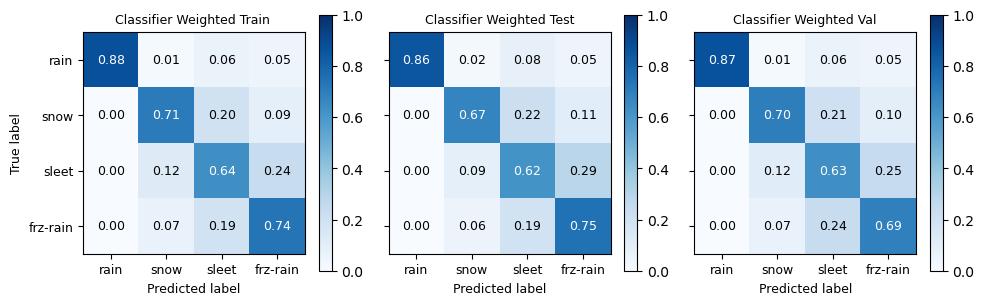

In [12]:
plot_confusion_matrix(ds, class_names, 9,True)

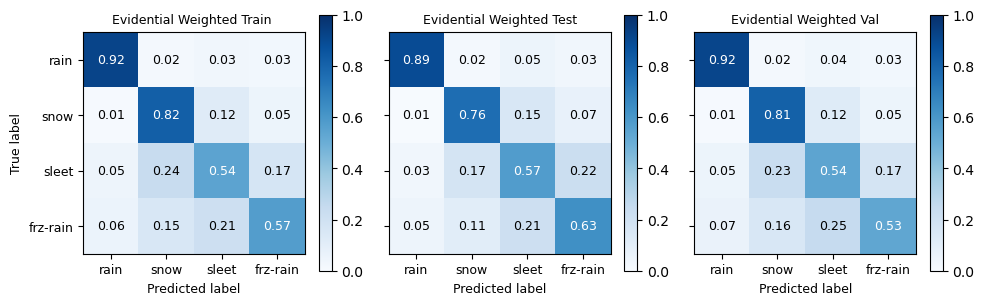

In [20]:
plot_confusion_matrix(ds, class_names, 9,True)

In [ ]:
plot_confusion_matrix(ds, class_names, 9, 'true')

In [69]:
# Prediction: 
pred= test_dataset['CRAIN'].values.flatten() 
pred = np.zeros(shape=pred.shape) 

In [70]:
rain_i = np.where(test_dataset['CRAIN'].values.flatten()==1) 
snow_i = np.where(test_dataset['CSNOW'].values.flatten()==1) 
sleet_i = np.where(test_dataset['CICEP'].values.flatten()==1)  
frzr_i = np.where(test_dataset['CFRZR'].values.flatten()==1)

#repopulate the numpy array 
pred[rain_i]=0
pred[snow_i]=1
pred[sleet_i]=2
pred[frzr_i]=3

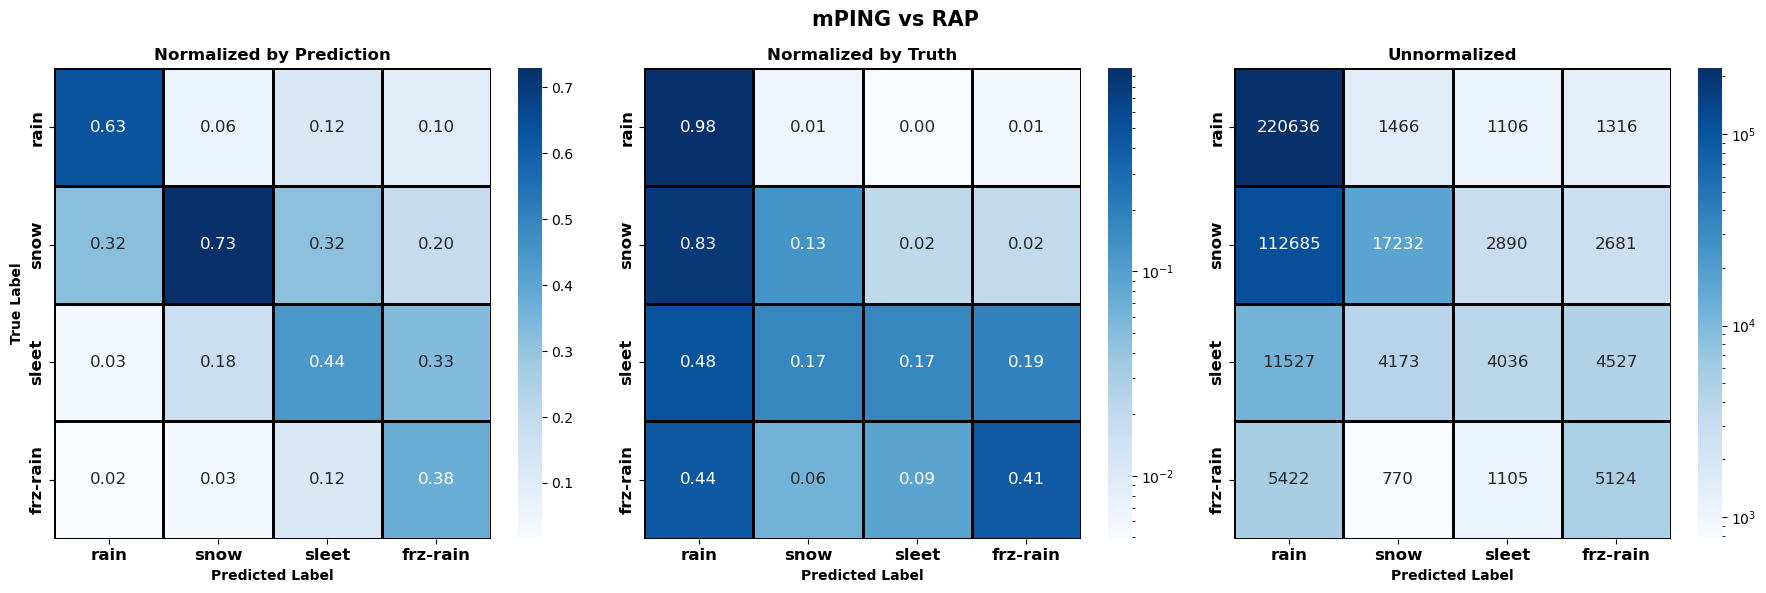

In [71]:
plot_3CM(test_true_labels, pred, "mPING vs RAP", class_names)

/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/ptype/plotting.py:269: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(


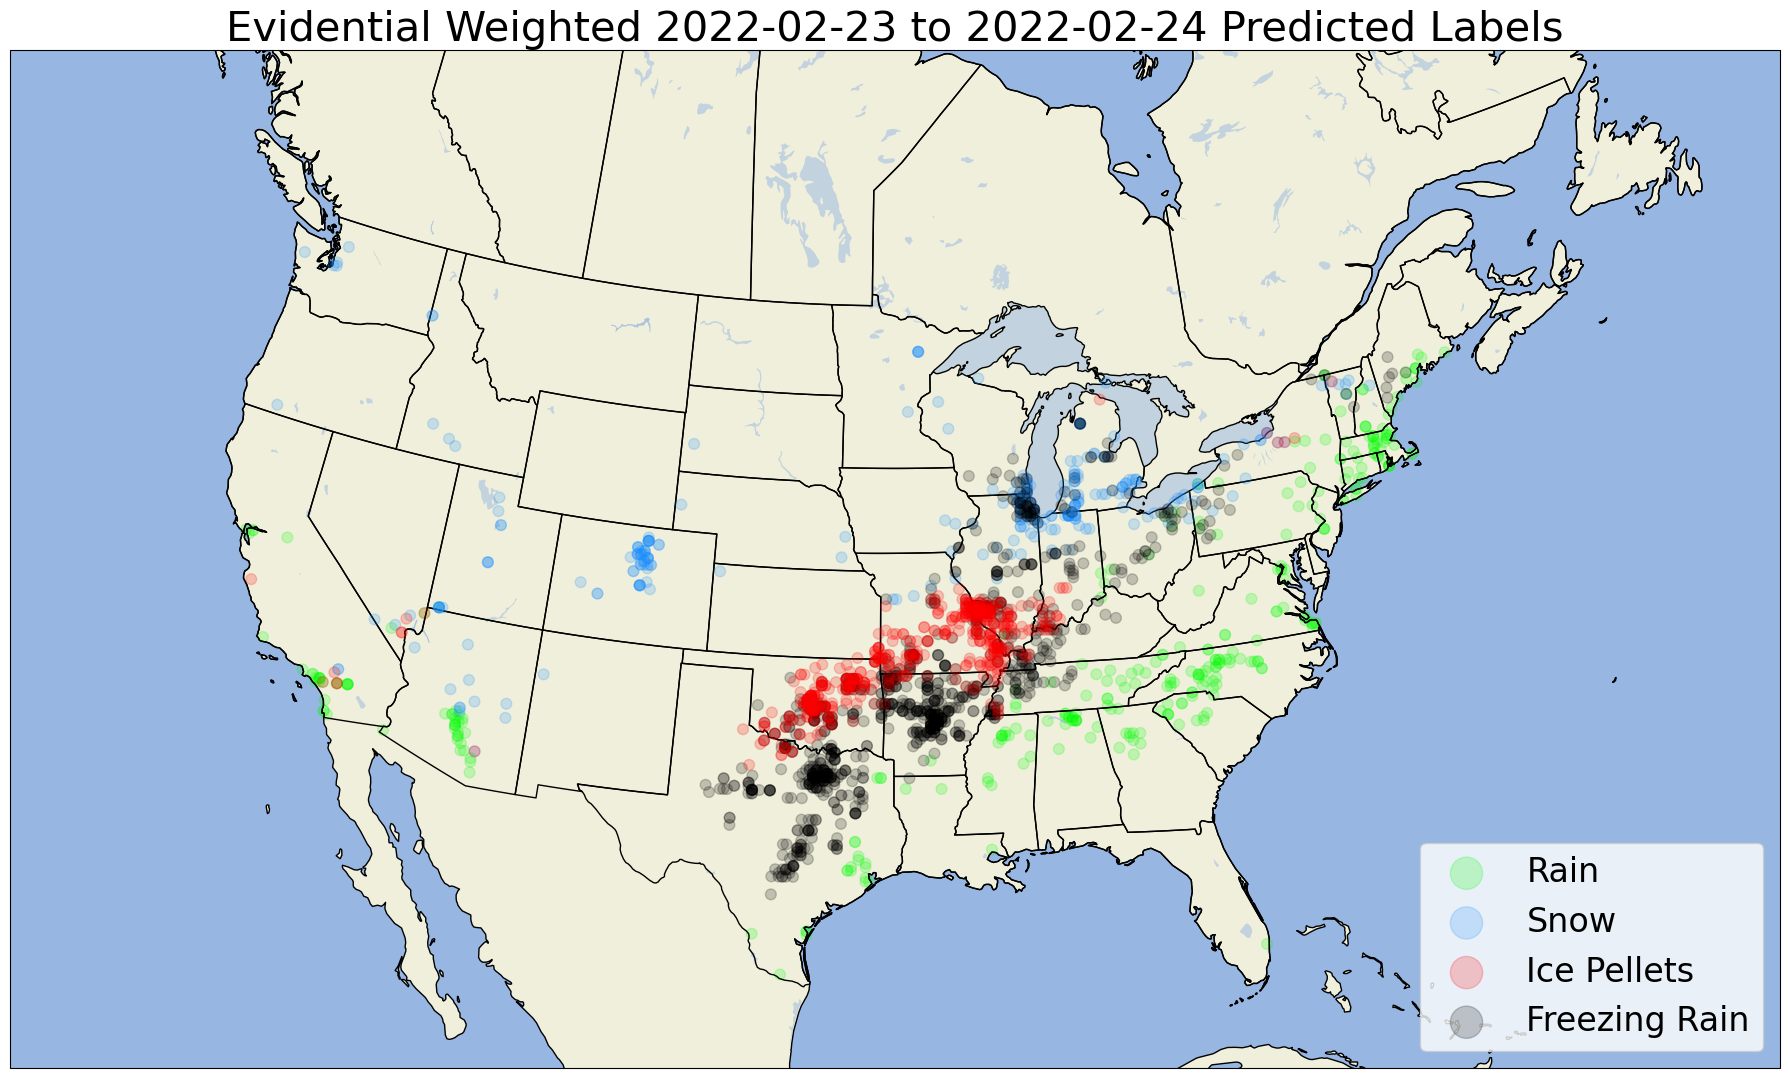

In [159]:
conus_plot(sourcedata, "Evidential Weighted")

In [ ]:
conus_plot(test_dataset, "Evidential Weighted")

In [95]:
rain_i = np.where(test_dataset['CRAIN'].values.flatten()==1) 
snow_i = np.where(test_dataset['CSNOW'].values.flatten()==1) 
sleet_i = np.where(test_dataset['CICEP'].values.flatten()==1)  
frzr_i = np.where(test_dataset['CFRZR'].values.flatten()==1)

#repopulate the numpy array 
pred[rain_i]=0
pred[snow_i]=1
pred[sleet_i]=2
pred[frzr_i]=3

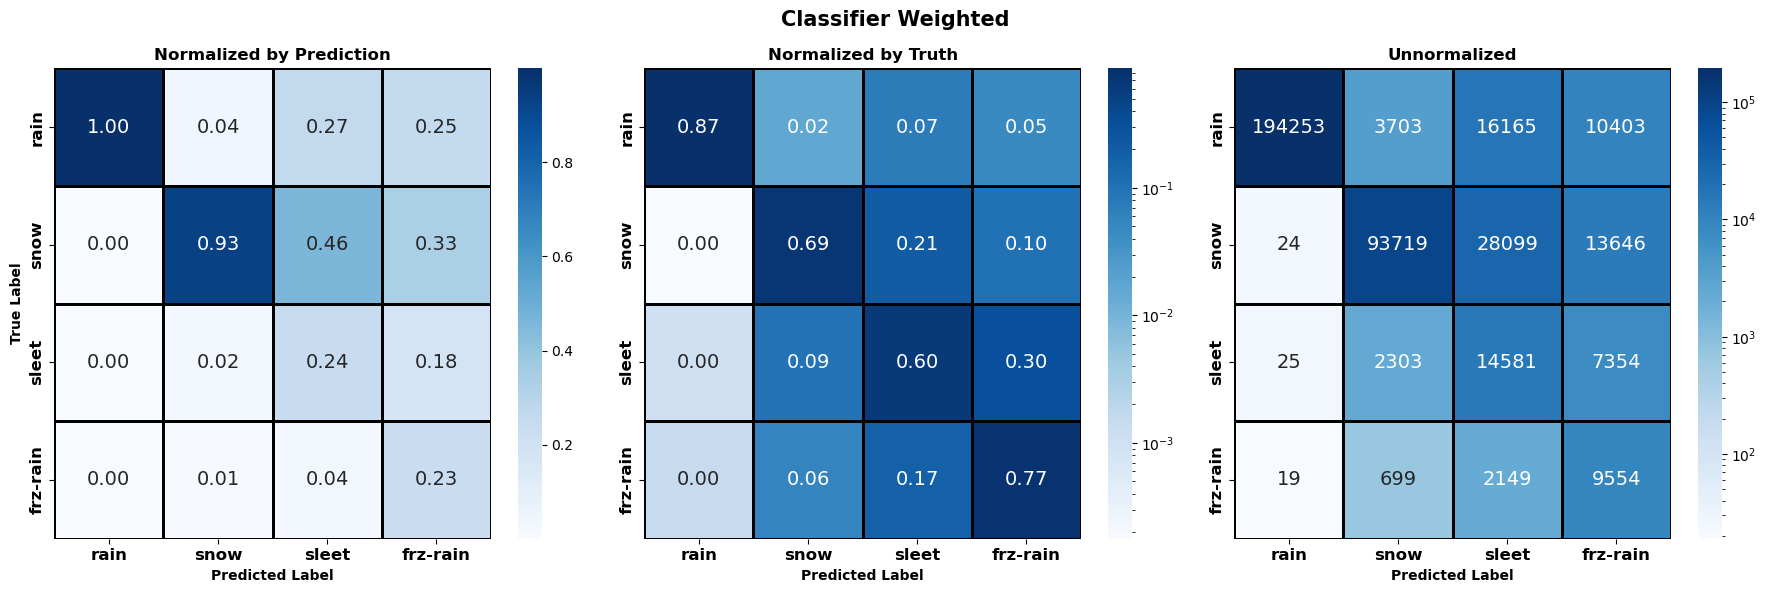

In [98]:
plot_3CM(test_true_labels, test_pred_labels, "Classifier Weighted", class_names)

In [13]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/classifier_unweighted/evaluate/"
data_files = ["train", "test", "val"]

for mod_num in range(20):
    #train dataset
    train_dataset = pd.read_parquet(join(path, f"train_{mod_num:d}.parquet"))
    train_pred_labels = np.append(train_pred_labels, train_dataset["pred_label"].values)
    train_true_labels =  np.append(train_true_labels, train_dataset["true_label"].values)
    
    #val dataset
    val_dataset = pd.read_parquet(join(path, f"val_{mod_num:d}.parquet"))
    val_pred_labels = np.append(val_pred_labels, val_dataset["pred_label"].values)
    val_true_labels =  np.append(val_true_labels, val_dataset["true_label"].values)
    
for mod_num in range (10):       
    #test dataset
    test_dataset = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))
    test_pred_labels = np.append(test_pred_labels, test_dataset["pred_label"].values)
    test_true_labels =  np.append(test_true_labels, test_dataset["true_label"].values)

In [14]:
ds = { "Classifier Unweighted Train ": {"true_label": train_true_labels, "pred_label": train_pred_labels},
      "Classifier Unweighted Test": {"true_label": test_true_labels, "pred_label": test_pred_labels}, 
      "Classifier Unweighted Val": {"true_label": val_true_labels, "pred_label": val_pred_labels}
     }

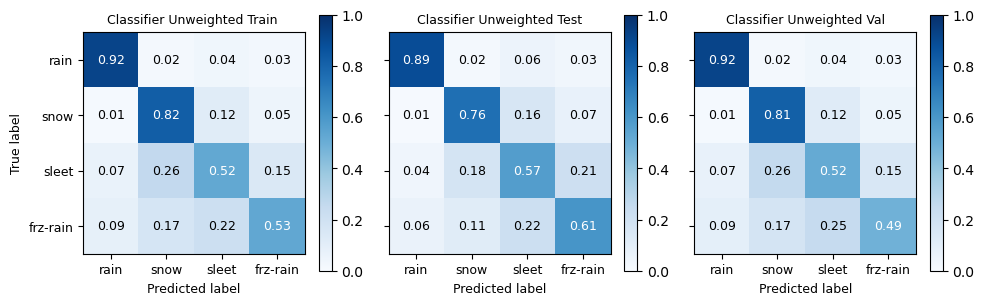

In [15]:
plot_confusion_matrix(ds, class_names, 9,True)

### Kentucky 

In [20]:
file_names = get_file_paths_rec("kentucky", 'rap')

In [21]:
ds = xr.open_dataset("/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/rap/20220223/0000/MILES_ptype_rap_2022-02-23_0000_f01.nc")
data_set = xr.open_mfdataset("/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/rap/20220223/0000/*.nc",concat_dim= "time",combine="nested") #parallel == true

In [ ]:
# Get the data from each

In [22]:
# ML categorical  
pred= ds['ML_crain'].values.flatten() 
pred = np.zeros(shape=pred.shape) 

In [23]:
rain_i = np.where(ds['ML_crain'].values.flatten()==1) 
snow_i = np.where(ds['ML_csnow'].values.flatten()==1) 
sleet_i = np.where(ds['ML_cicep'].values.flatten()==1)  
frzr_i = np.where(ds['ML_cfrzr'].values.flatten()==1)

#repopulate the numpy array 
pred[rain_i]=0
pred[snow_i]=1
pred[sleet_i]=2
pred[frzr_i]=3

In [24]:
#Labels:
truth = ds['crain'].values.flatten()
truth = np.zeros(shape=truth.shape)

In [25]:
rain_i_T = np.where(ds['crain'].values.flatten()==1)
snow_i_T= np.where(ds['csnow'].values.flatten()==1) 
sleet_i_T= np.where(ds['cicep'].values.flatten()==1) 
frzr_i_T= np.where(ds['cfrzr'].values.flatten()==1) 

truth[rain_i_T]=0
truth[snow_i_T]=1
truth[sleet_i_T]=2
truth[frzr_i_T]=3

In [27]:
type(truth)

numpy.ndarray

In [28]:
#plot_3CM(truth, pred, "ky case", class_names)